### Import & Data load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from tqdm import tqdm
import os
import seaborn as sns
import re

_dir = '_21'
_month = '02'
_file_ls = [i for i in os.listdir(_dir) if re.split('/|_',_dir)[-1]+_month in re.split('_', i)]
freez2005 = pd.read_csv(os.path.join(_dir, [i for i in _file_ls if 'freezer' in i][0]))
suth2005 = pd.read_csv(os.path.join(_dir, [i for i in _file_ls if 'suth' in i][0]))

freez2005.columns
freez2005.columns = ['freezer_id', 'gw_time', 'status', 'fan_run', 'fan_trip',
       'freez_run', 'freez_trip', 'defrost', 'ctrl_mode', 'ctrl_operation',
       'operation', 'run_time', 'insert_dt']

suth2005.columns
suth2005.columns = ['sensor_id', 'gw_time', 'status', 'color_list', 'avg_temperature',
       'avg_humidity', 'temperature', 'humidity', 'battery', 'available',
       'insert_dt']

%matplotlib inline

### 제조설비(26) sensor, freezer 추출, Column 선별, Type 재설정

In [2]:
# No. 16
sensor_id = [585, 588, 591, 594]
freezer_id = [600, 606]

df_sensor = pd.DataFrame()
df_freezer = pd.DataFrame()

for elem in sensor_id:
    df_sensor = pd.concat([df_sensor, suth2005[suth2005['sensor_id'] == elem]])
    print("sensor id {}의 데이터 개수: {}".format(elem, len(suth2005[suth2005['sensor_id'] == elem])))
for elem in freezer_id:
    df_freezer = pd.concat([df_freezer, freez2005[freez2005['freezer_id'] == elem]])
    print("freezer id {}의 데이터 개수: {}".format(elem, len(df_freezer[df_freezer['freezer_id'] == elem])))

df_sensor.sort_values(by = ['sensor_id', 'gw_time'])
df_freezer.sort_values(by = ['freezer_id', 'gw_time'])

print('sensor: ',df_sensor['sensor_id'].unique())
print('freezer: ', df_freezer['freezer_id'].unique())

df_sensor = df_sensor.drop(columns = ['color_list','insert_dt'])
df_freezer = df_freezer.drop(columns= ['insert_dt'])

df_sensor['gw_time'] = pd.to_datetime(df_sensor['gw_time'])
df_freezer['gw_time'] = pd.to_datetime(df_freezer['gw_time'])


sensor id 585의 데이터 개수: 80004
sensor id 588의 데이터 개수: 80004
sensor id 591의 데이터 개수: 80004
sensor id 594의 데이터 개수: 80004
freezer id 600의 데이터 개수: 83336
freezer id 606의 데이터 개수: 83336
sensor:  [585 588 591 594]
freezer:  [600 606]


# Sensor 결측치 처리
- sensor의 available == 0 일 때, 결측치 발생
- 결측치는 모두 -99999로 되어있음

In [3]:
df_sensor.isnull().sum()

sensor_id          0
gw_time            0
status             0
avg_temperature    0
avg_humidity       0
temperature        0
humidity           0
battery            0
available          0
dtype: int64

In [4]:
condition = df_sensor.values == -99999
df_sensor[condition] = np.nan

# Freezer

## status

- 모든 status가 1

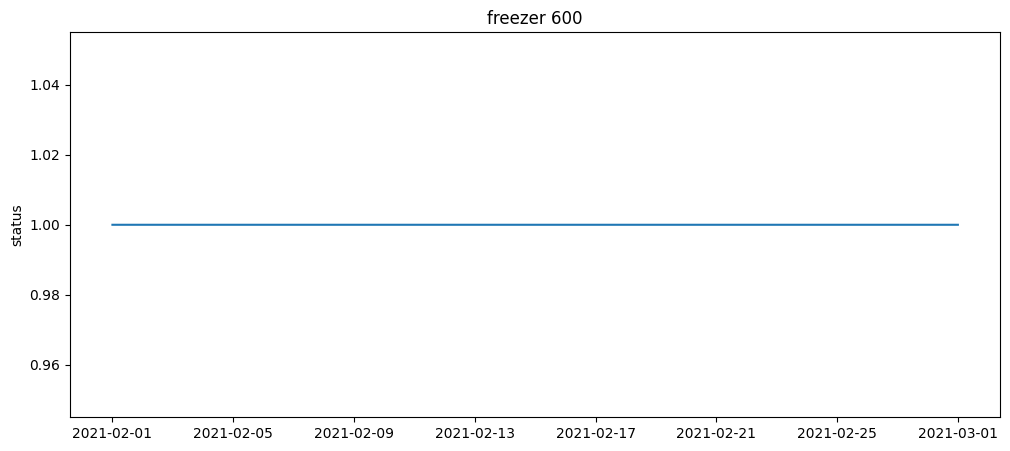

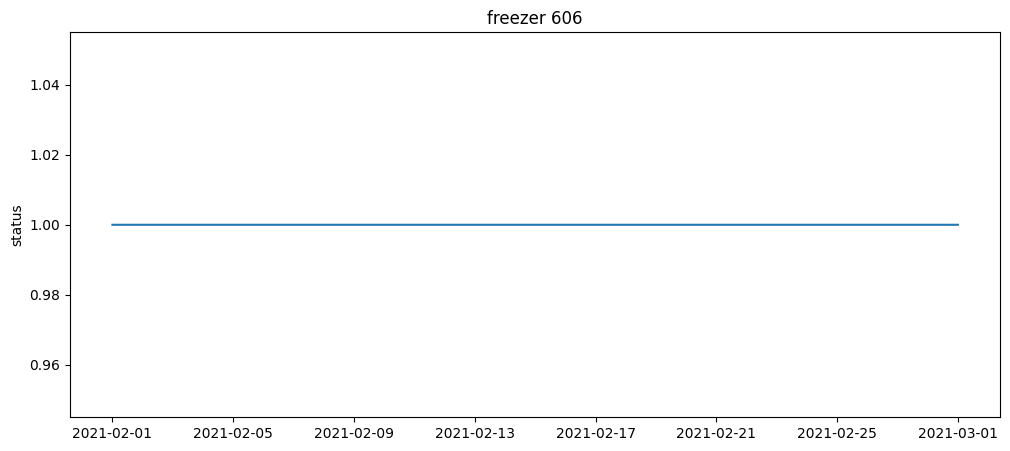

In [5]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('status')
    plt.plot(df_tmp['gw_time'], df_tmp['status'])
    

## fan_run

- 19년도 데이터와는 다른 불규칙적인 패턴

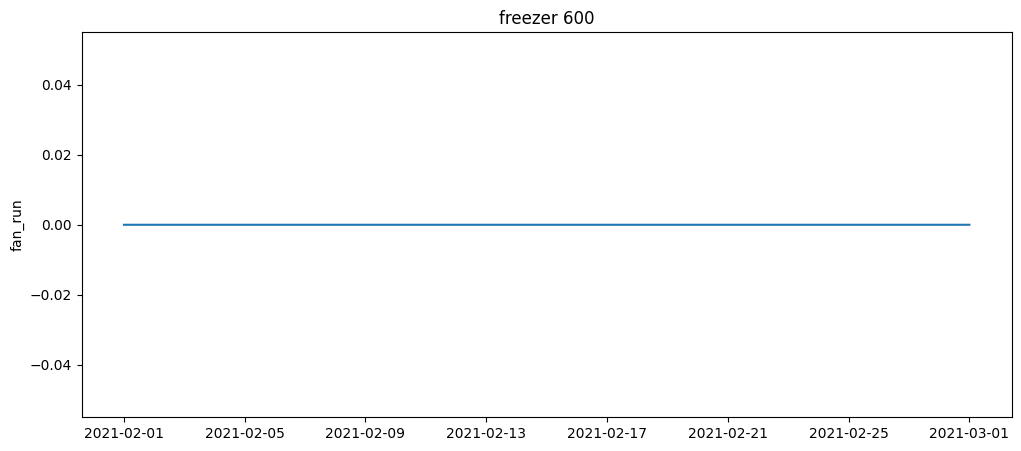

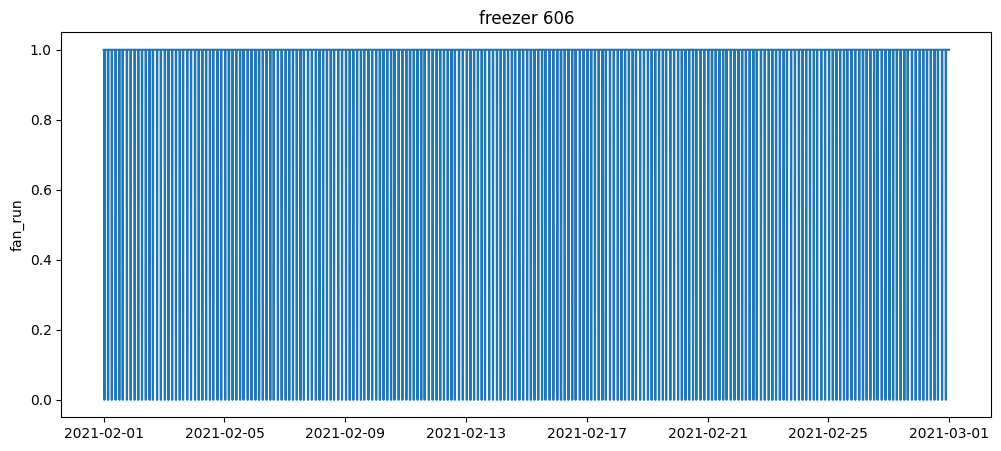

In [6]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('fan_run')
    plt.plot(df_tmp['gw_time'], df_tmp['fan_run'])

## fan_trip

- 모든 trip(차단)이 0

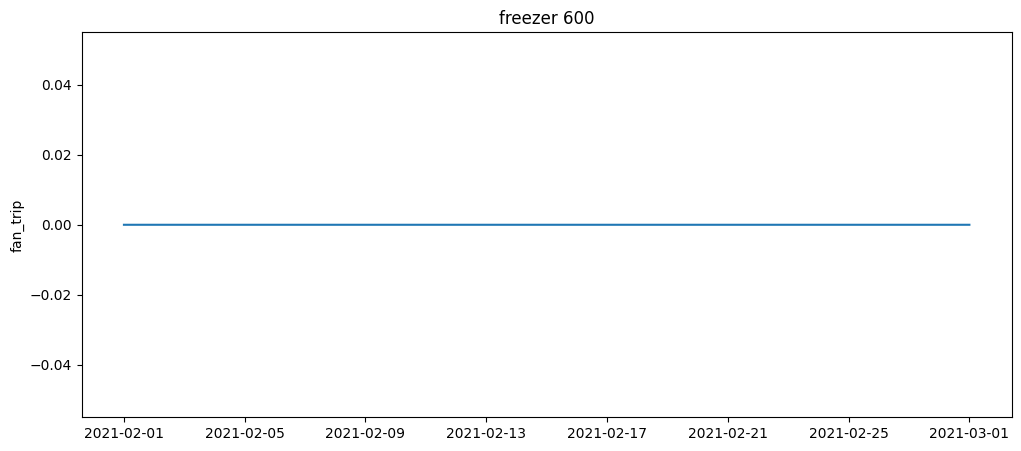

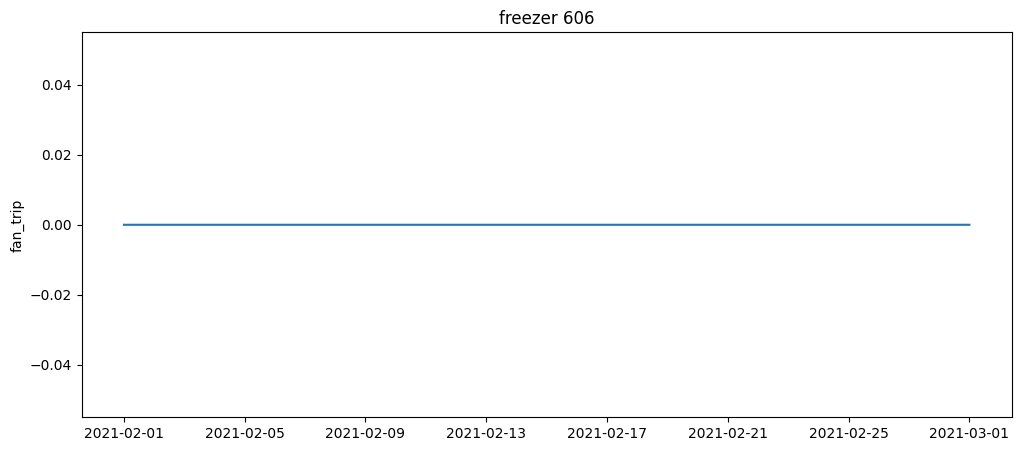

In [7]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('fan_trip')
    plt.plot(df_tmp['gw_time'], df_tmp['fan_trip'])

## freez_run

- fan과 마찬가지로 불규칙적인 패턴

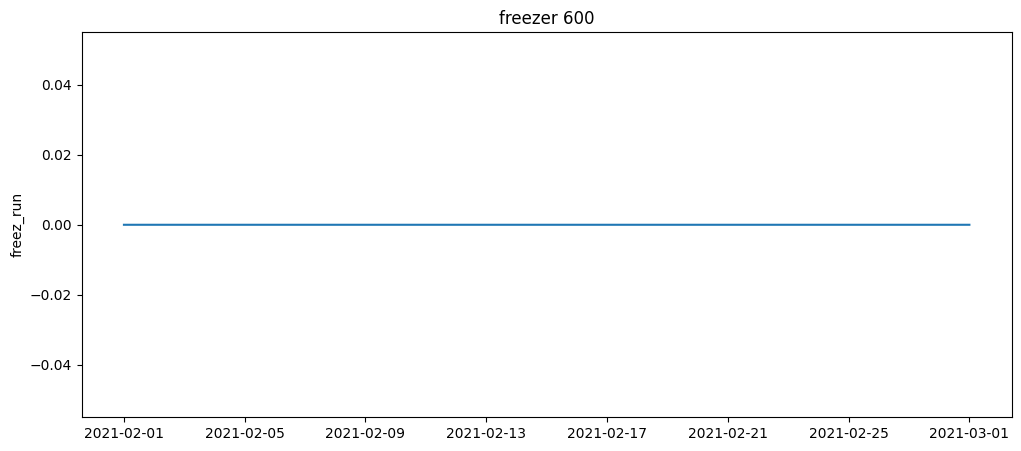

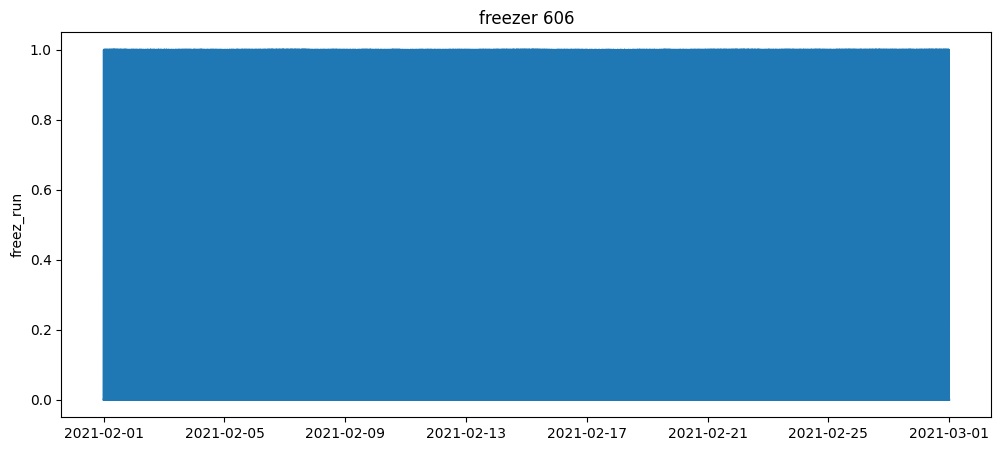

In [8]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('freez_run')
    plt.plot(df_tmp['gw_time'], df_tmp['freez_run'])

## freez_trip

- fan과 마찬가지로 전구간 값이 0

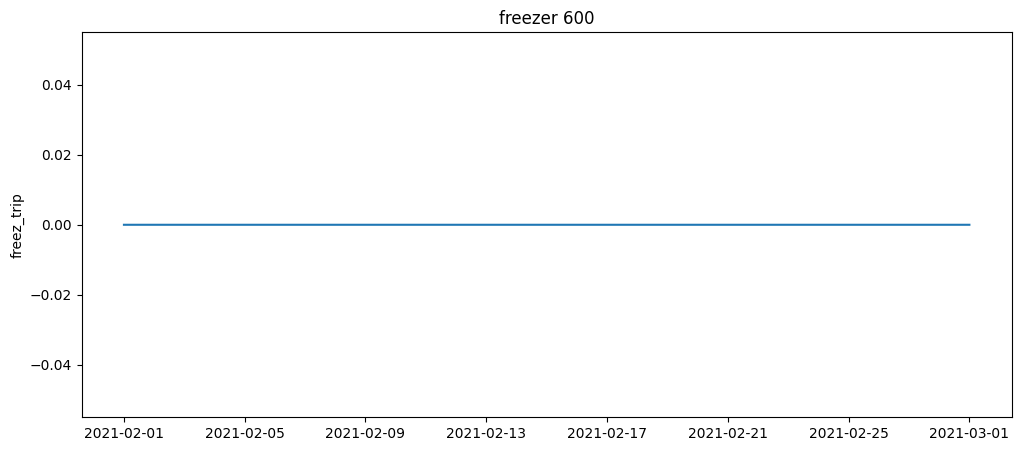

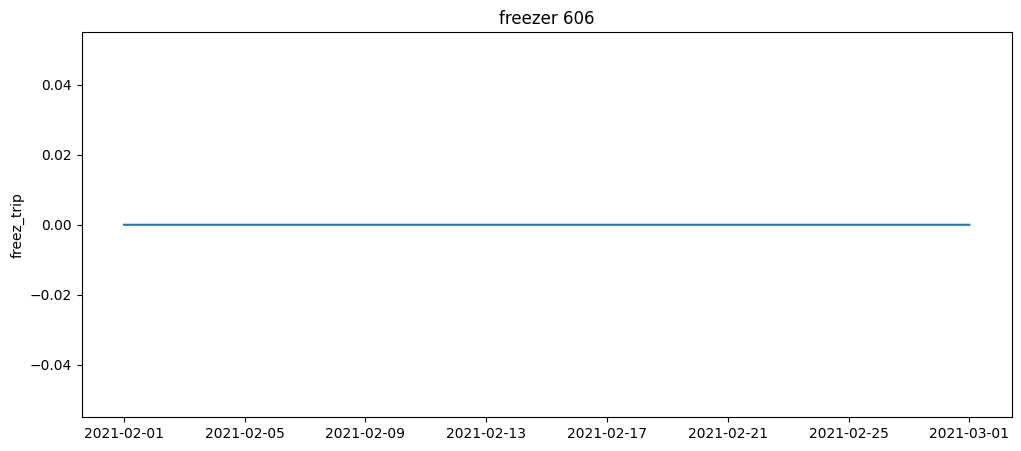

In [9]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('freez_trip')
    plt.plot(df_tmp['gw_time'], df_tmp['freez_trip'])

## defrost

- 19년도 데이터와 다르게 fan_run과 inverse한 값이 나타나지 않고 불규칙적

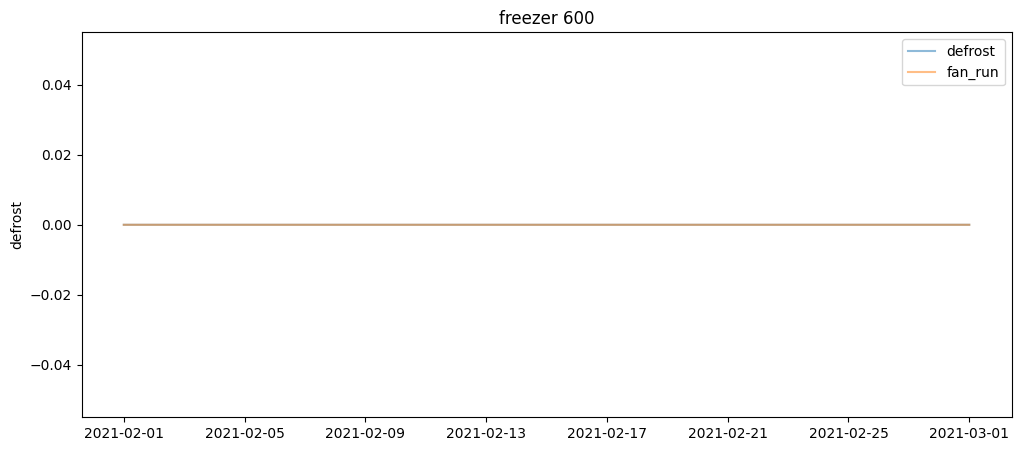

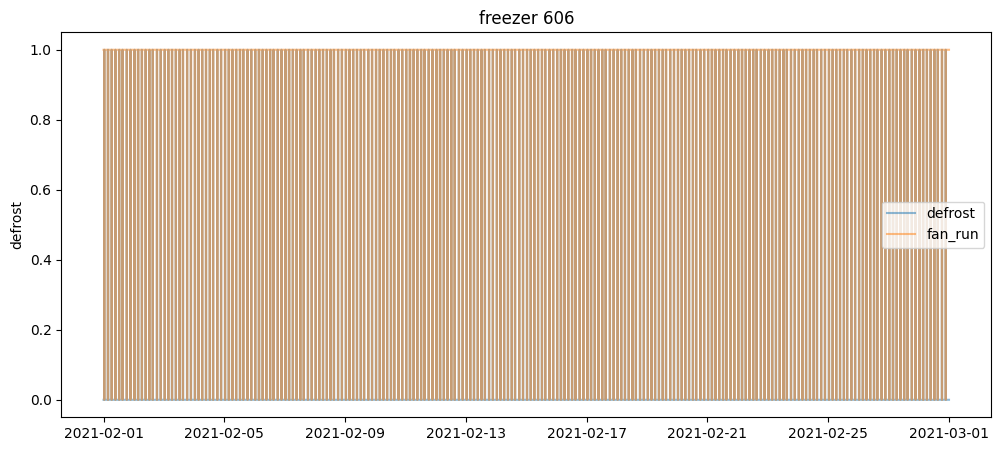

In [10]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('defrost')
    plt.plot(df_tmp['gw_time'], df_tmp['defrost'], alpha = 0.5, label = 'defrost')
    plt.plot(df_tmp['gw_time'], df_tmp['fan_run'], alpha = 0.5, label = 'fan_run')
    plt.legend()

## ctrl_mode

- 전구간 운영모드는 1(자동)

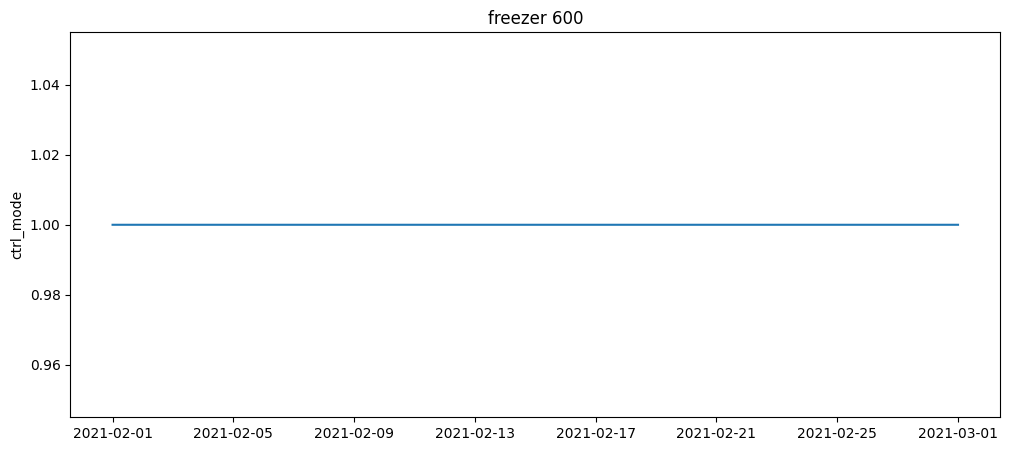

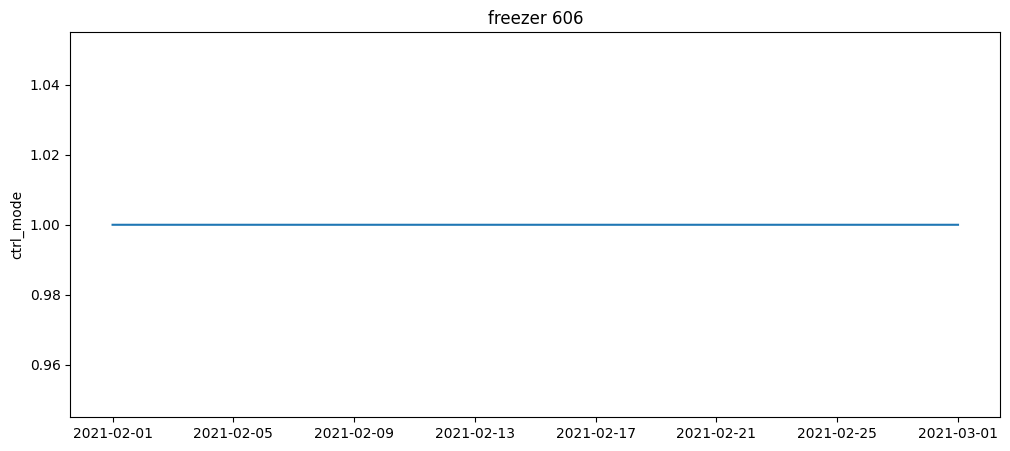

In [11]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('ctrl_mode')
    plt.plot(df_tmp['gw_time'], df_tmp['ctrl_mode'])

## ctrl_operation

- 전구간 operation과 같은 변화를 보이며, 제어 요청상태가 불규칙적으로 변함

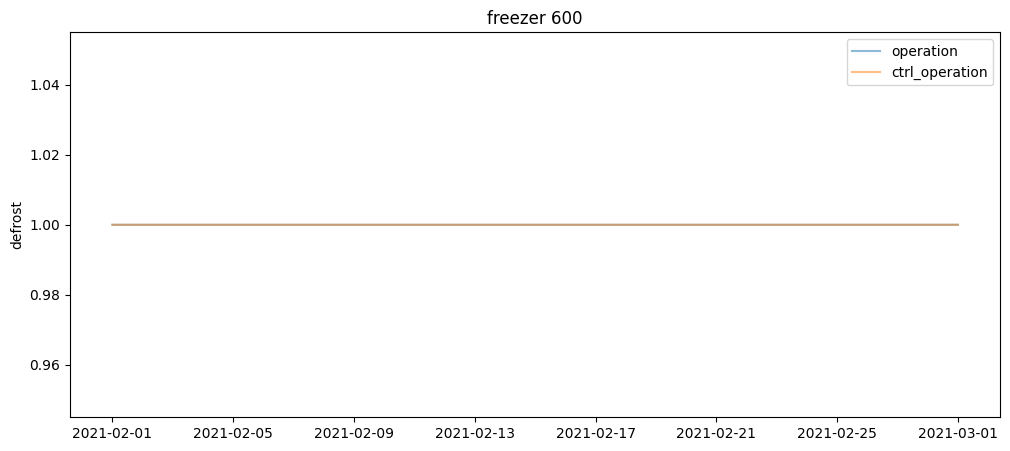

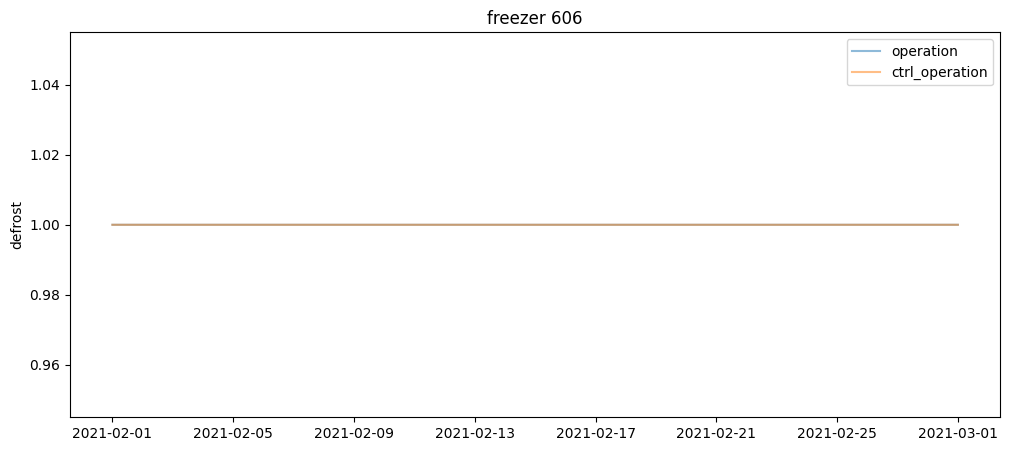

In [12]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('defrost')
    plt.plot(df_tmp['gw_time'], df_tmp['operation'], alpha = 0.5, label = 'operation')
    plt.plot(df_tmp['gw_time'], df_tmp['ctrl_operation'], alpha = 0.5, label = 'ctrl_operation')
    plt.legend()

## operation


- sv 실제 가동상태로 불규칙적 변화

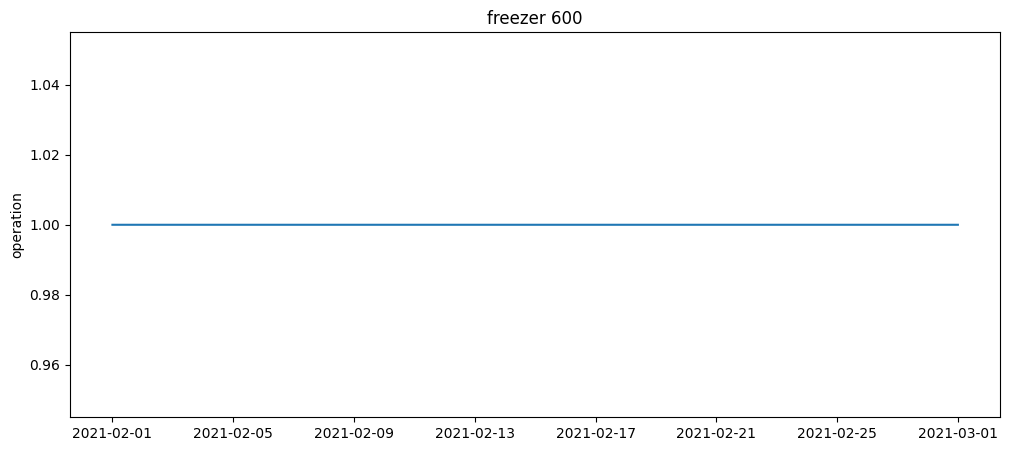

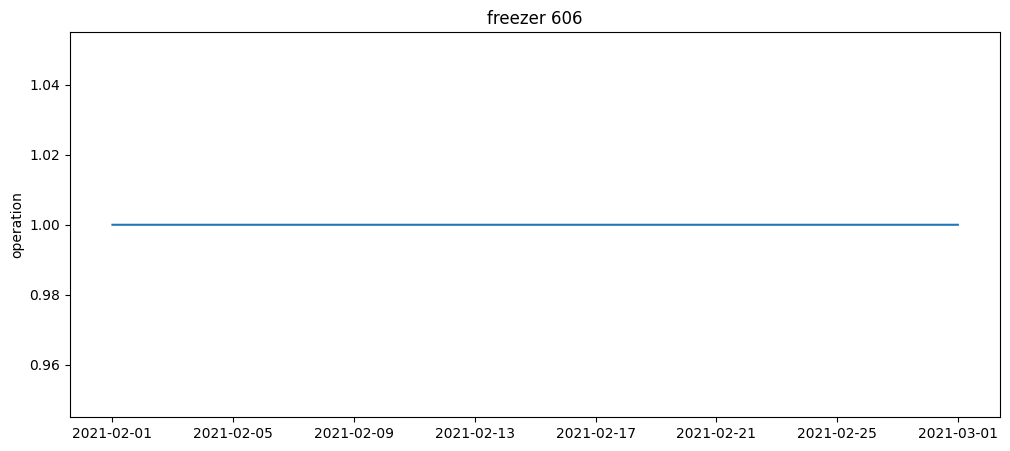

In [13]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('operation')
    plt.plot(df_tmp['gw_time'], df_tmp['operation'])

## run_time

- 19년도 데이터와는 다르게 일별 가동시간 줄어듦, 불연속적 가동 (run_time이 비선형적으로 증가하는 모습)

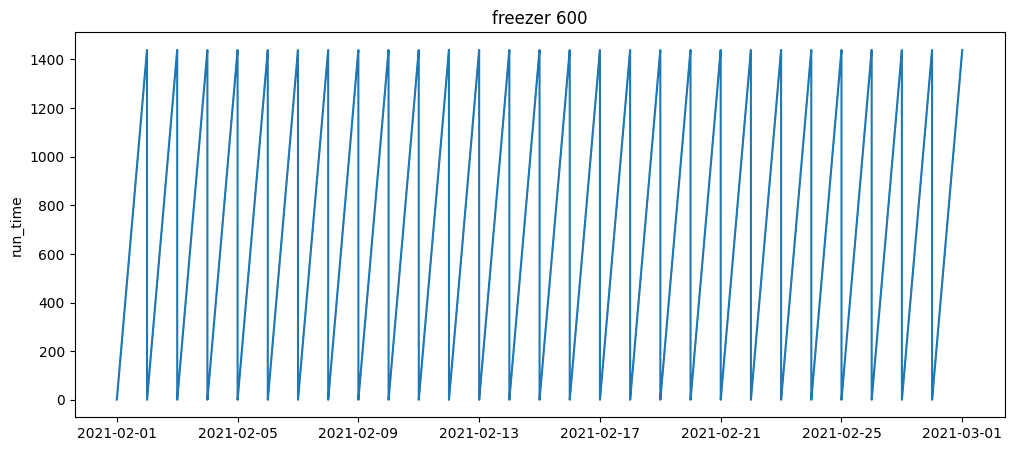

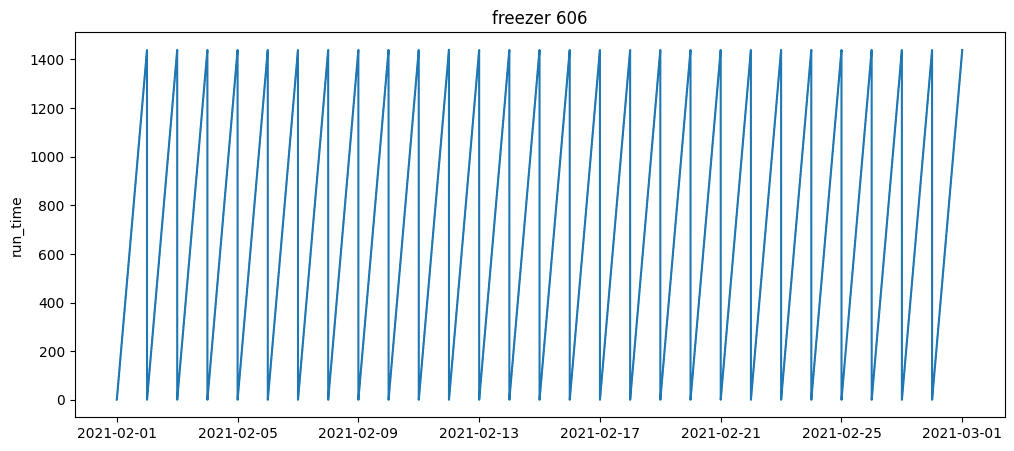

In [14]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('run_time')
    plt.plot(df_tmp['gw_time'], df_tmp['run_time'])

## 변수 묶어서 보기
- operation이 0이면 run time은 증가하지 않음

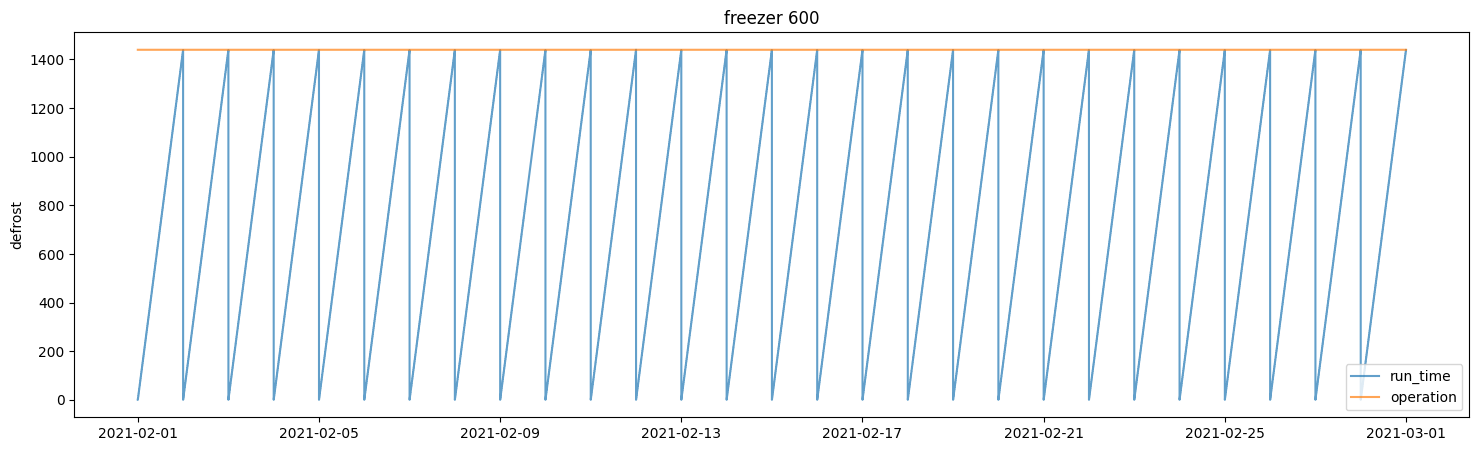

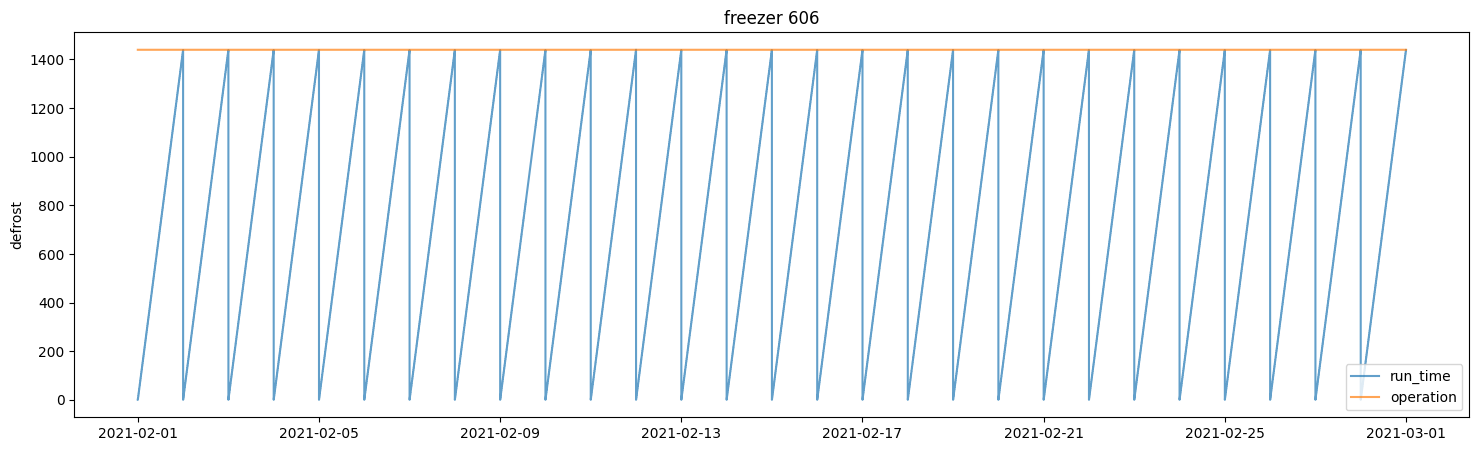

In [15]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (18,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('defrost')
    plt.plot(df_tmp['gw_time'], df_tmp['run_time'], alpha = 0.7, label = 'run_time')
    # plt.plot(df_tmp['gw_time'], df_tmp['operation']*1440, alpha = 0.7, label = 'ctrl_operation')
    # plt.plot(df_tmp['gw_time'], df_tmp['operation']*1440, alpha = 0.7, label = 'ctrl_mode')
    plt.plot(df_tmp['gw_time'], df_tmp['operation']*1440, alpha = 0.7, label = 'operation')
    plt.legend()

# Sensor

## status

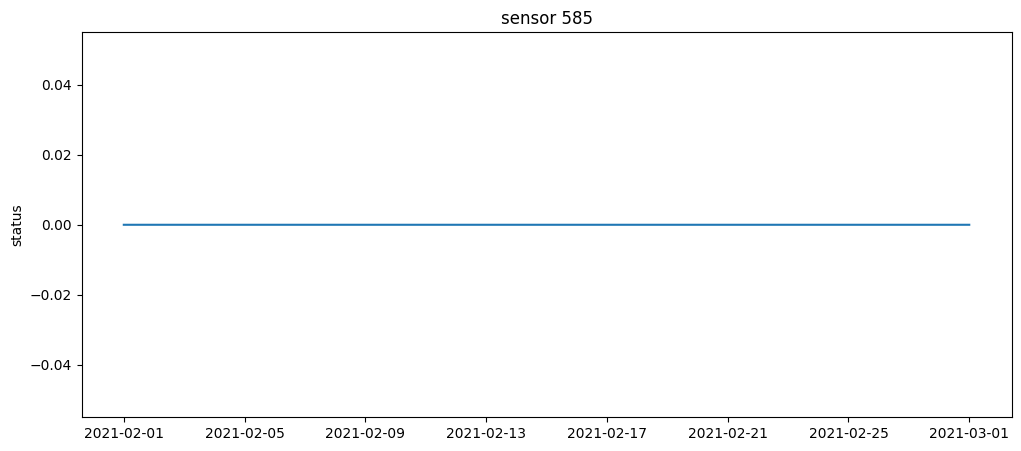

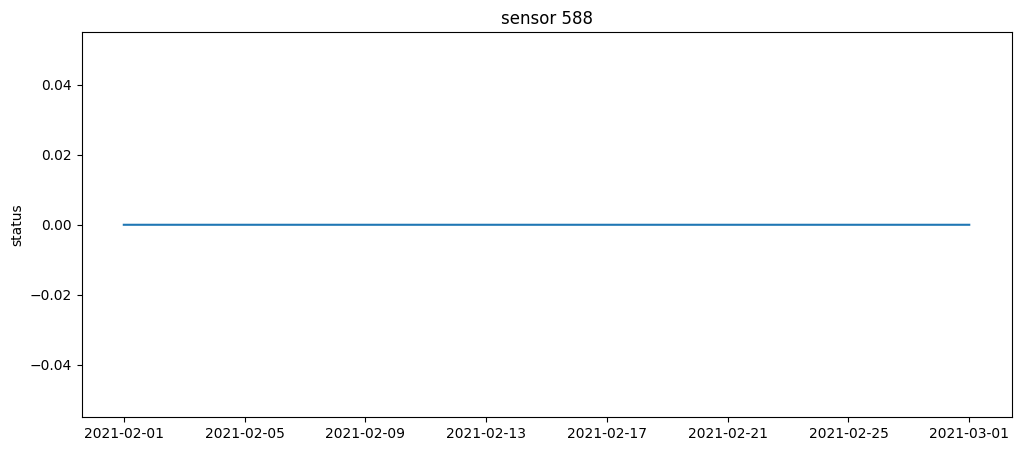

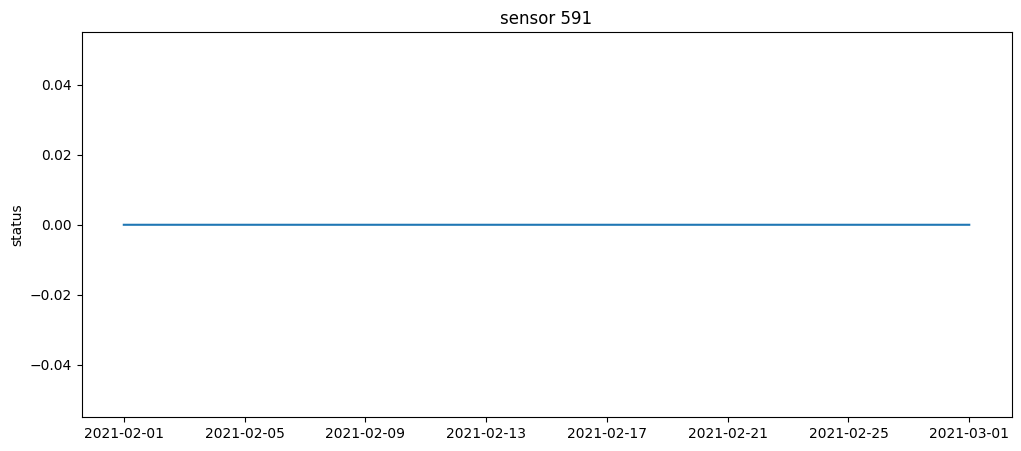

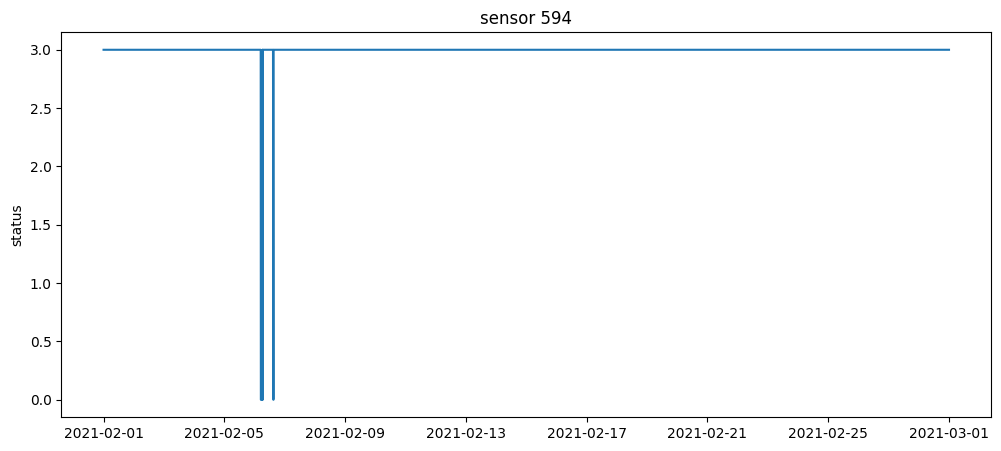

In [16]:
for _id in df_sensor['sensor_id'].unique():
    df_tmp = df_sensor[df_sensor['sensor_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('sensor {}'.format(_id))
    plt.ylabel('status')
    plt.plot(df_tmp['gw_time'], df_tmp['status'])

## avg_temperature & temperature

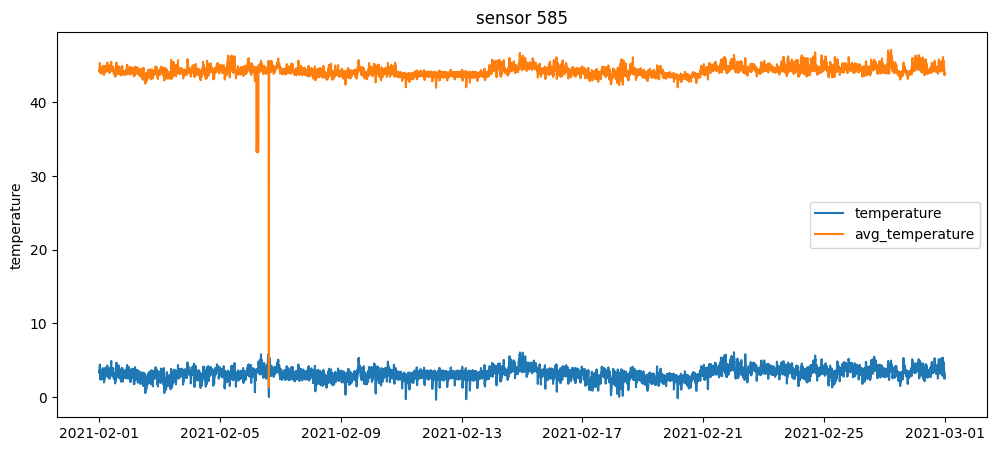

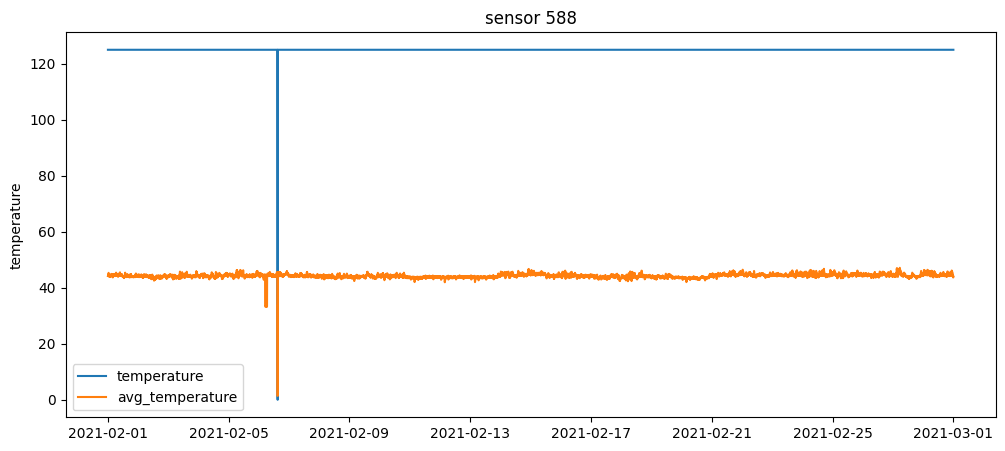

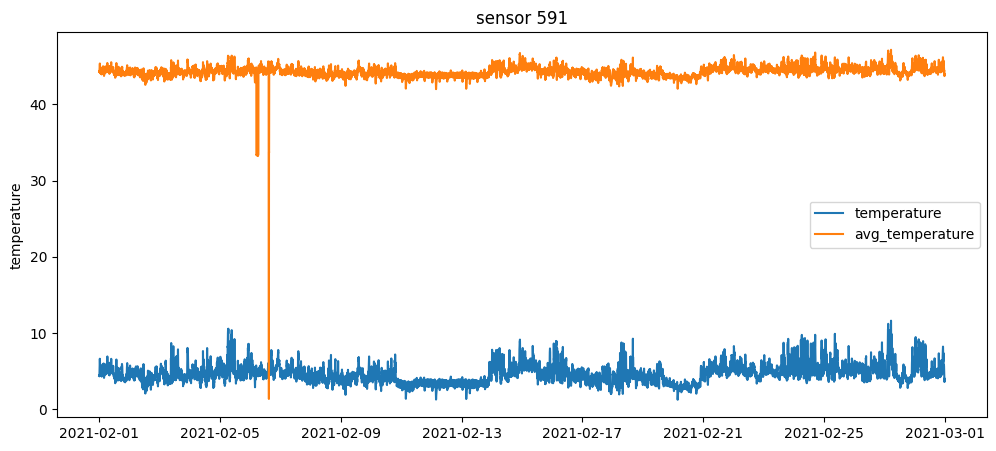

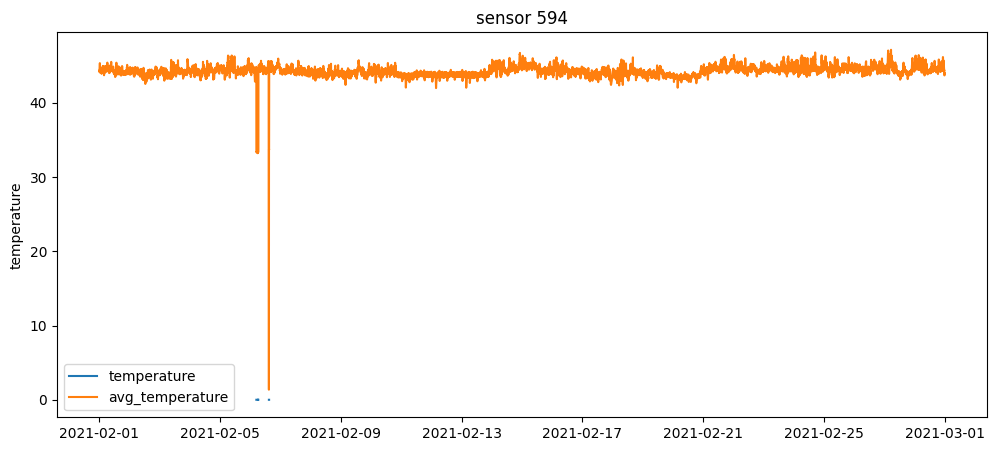

In [17]:
for _id in df_sensor['sensor_id'].unique():
    df_tmp = df_sensor[df_sensor['sensor_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('sensor {}'.format(_id))
    plt.ylabel('temperature')
    plt.plot(df_tmp['gw_time'], df_tmp['temperature'], label = 'temperature')
    plt.plot(df_tmp['gw_time'], df_tmp['avg_temperature'], label = 'avg_temperature')
    plt.legend()

## avg_humidity & humidity

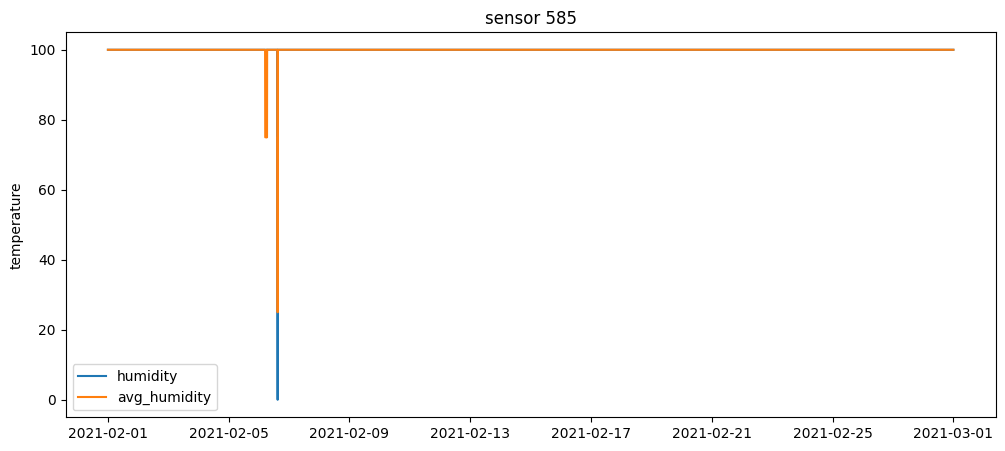

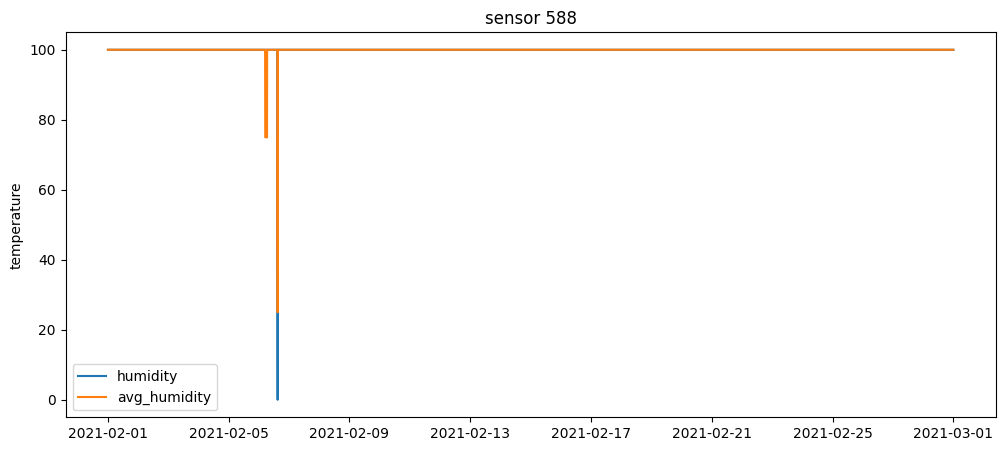

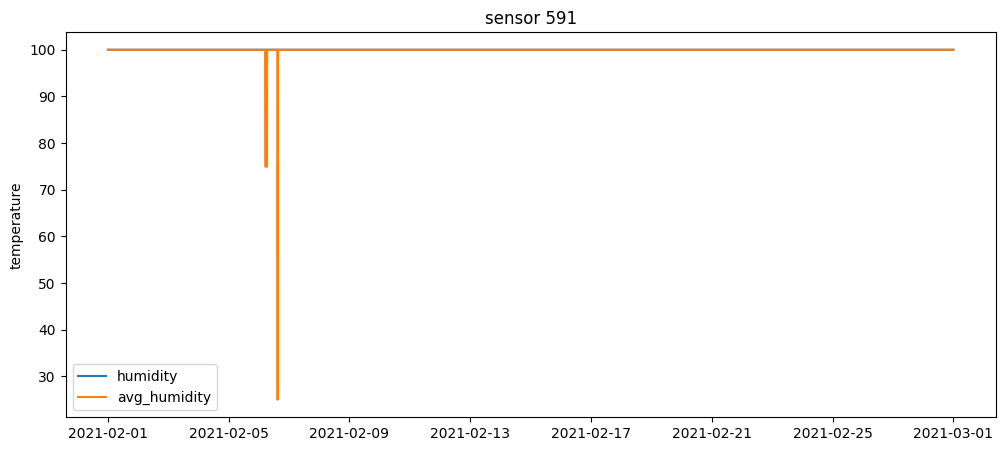

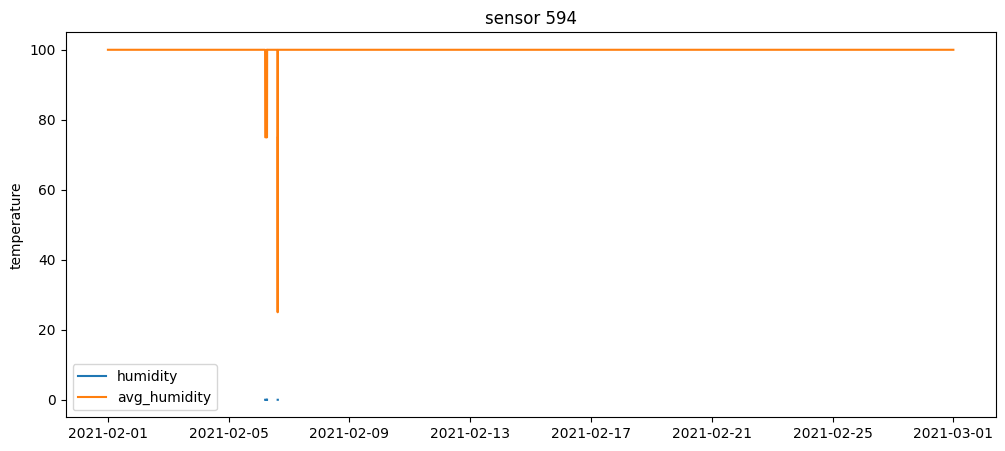

In [18]:
for _id in df_sensor['sensor_id'].unique():
    df_tmp = df_sensor[df_sensor['sensor_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('sensor {}'.format(_id))
    plt.ylabel('temperature')
    plt.plot(df_tmp['gw_time'], df_tmp['humidity'], label = 'humidity')
    plt.plot(df_tmp['gw_time'], df_tmp['avg_humidity'], label = 'avg_humidity')
    plt.legend()

## battery

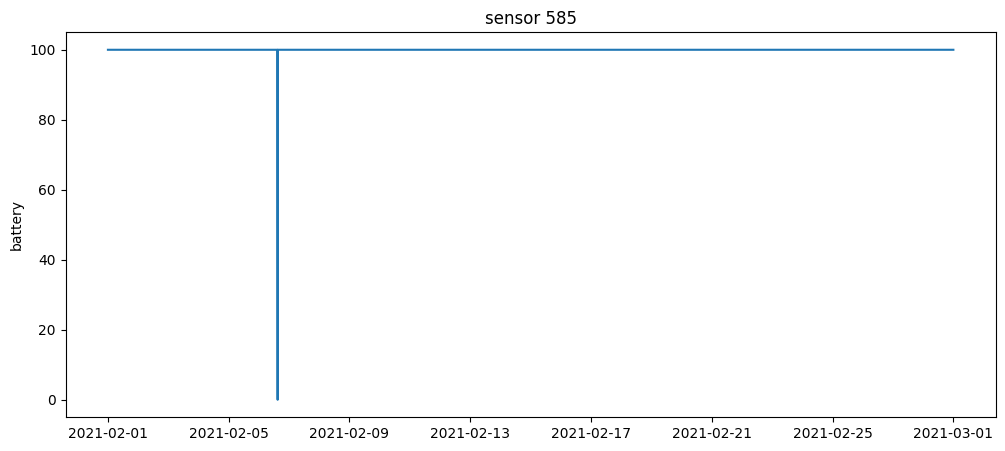

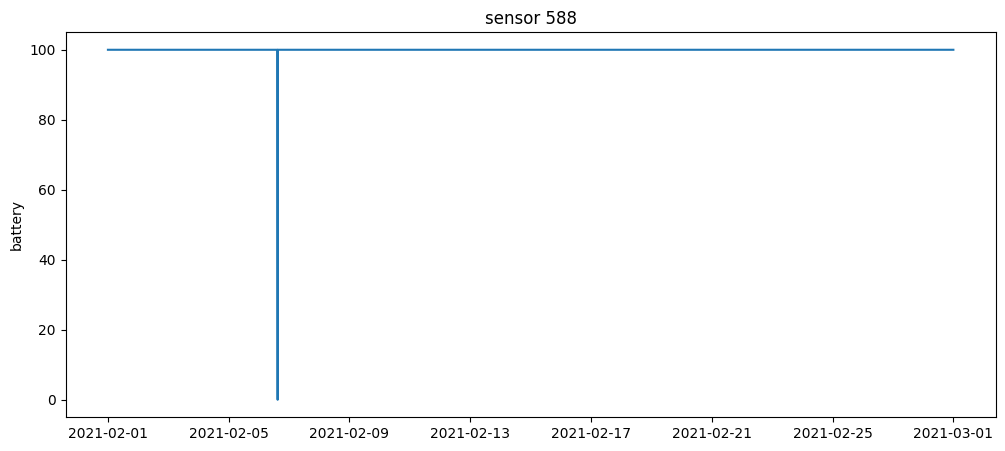

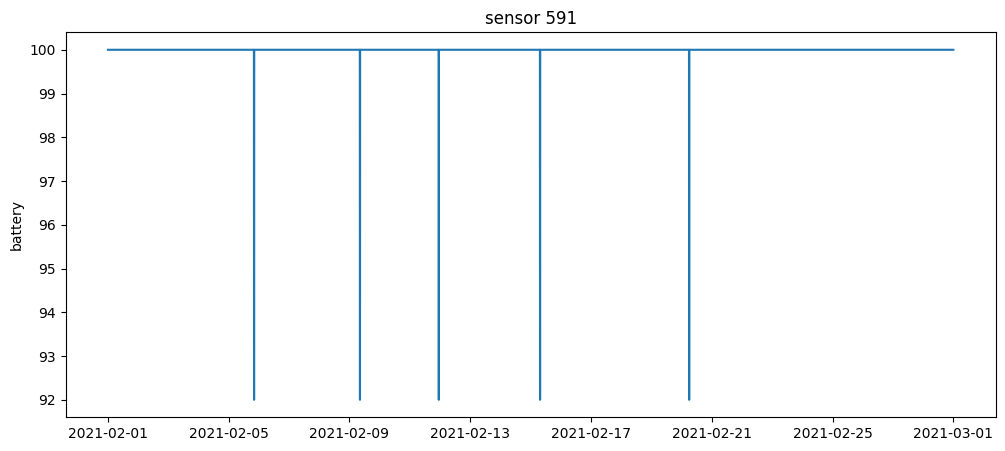

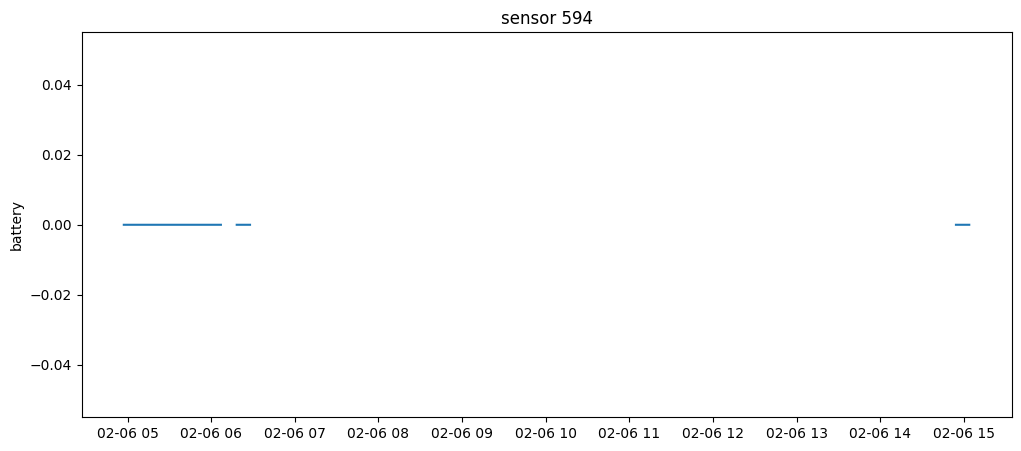

In [19]:
for _id in df_sensor['sensor_id'].unique():
    df_tmp = df_sensor[df_sensor['sensor_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('sensor {}'.format(_id))
    plt.ylabel('battery')
    plt.plot(df_tmp['gw_time'], df_tmp['battery'])

## available

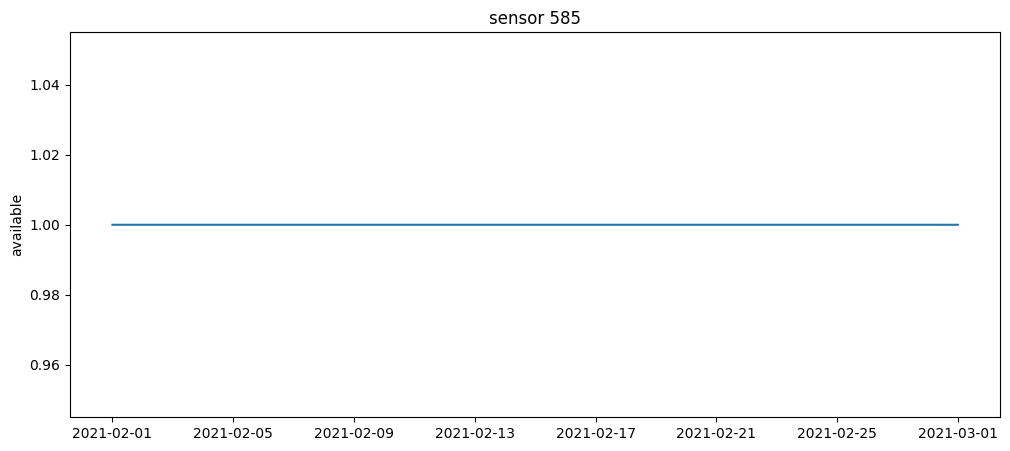

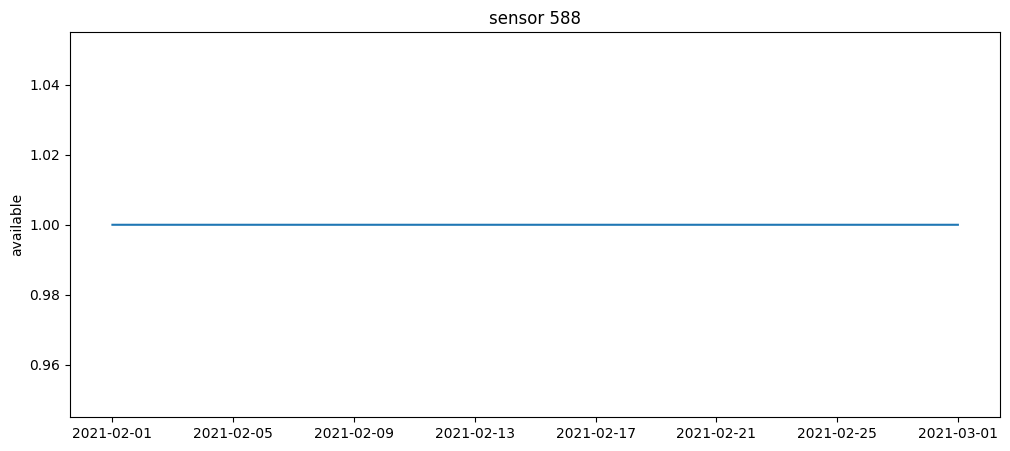

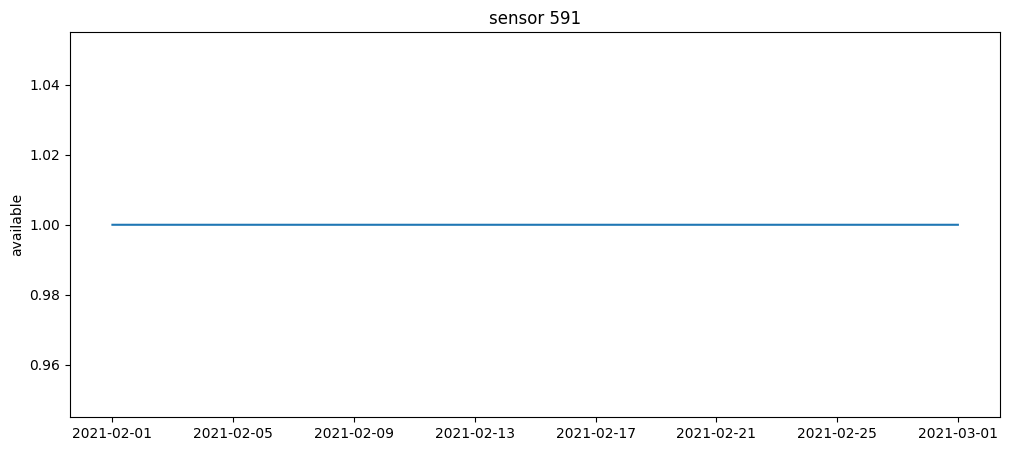

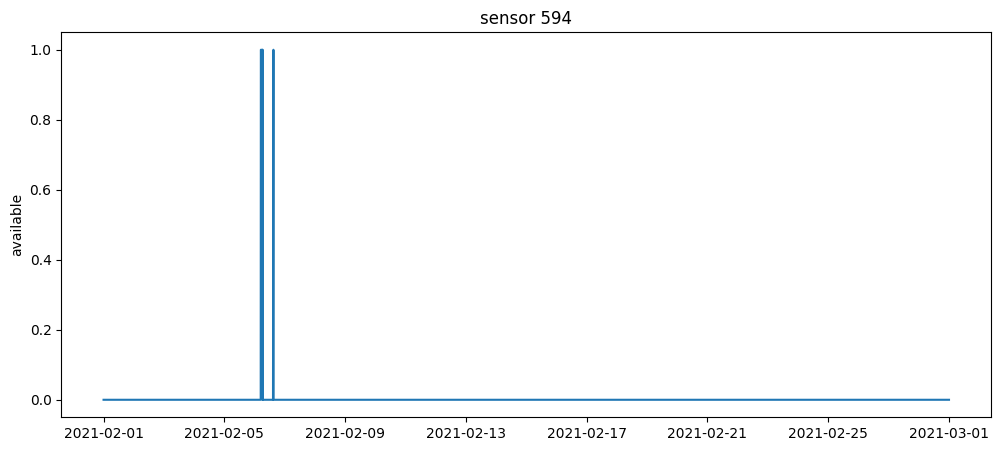

In [20]:
for _id in df_sensor['sensor_id'].unique():
    df_tmp = df_sensor[df_sensor['sensor_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('sensor {}'.format(_id))
    plt.ylabel('available')
    plt.plot(df_tmp['gw_time'], df_tmp['available'])

# Position

In [21]:
# sensor_pos = {
#     "290": {"x": 2, "y": 3},
#     "293": {"x": 5, "y": 3},
#     "296": {"x": 3, "y": 8},
#     "299": {"x": 4, "y": 14},
#     "302": {"x": 4, "y": 5}
# }
# freezer_pos = {
#     "308": {"x": 2, "y": 1},
#     "314": {"x": 6, "y": 1},
#     "320": {"x": 8, "y": 10},
#     "326": {"x": 4, "y": 17}
# }

# sensor_pos = pd.DataFrame(sensor_pos).T
# freezer_pos = pd.DataFrame(freezer_pos).T

# sensor_pos = sensor_pos.reset_index()
# freezer_pos = freezer_pos.reset_index()
# pos = pd.concat([sensor_pos,freezer_pos])


In [22]:
## no. 19
# sensor_pos = {
#     "329": {"x": 16, "y": 5},
#     "332": {"x": 10, "y": 5},
#     "335": {"x": 4, "y": 5},
#     "338": {"x": 18, "y": 1}
# }
# freezer_pos = {
#     "344": {"x": 16, "y": 0},
#     "344-1": {"x": 14, "y": 0},
#     "362": {"x": 11, "y": 0},
#     "362-1": {"x": 8, "y": 0},
#     "368": {"x": 4, "y": 0},
#     "368-1": {"x": 2, "y": 0}
# }
# door_pos = {
#     "door": {"x": 4, "y": 9}
# }

# sensor_pos = pd.DataFrame(sensor_pos).T
# sensor_pos['type'] = ['sensor']*len(sensor_pos)
# freezer_pos = pd.DataFrame(freezer_pos).T
# freezer_pos['type'] = ['freezer']*len(freezer_pos)
# door_pos = pd.DataFrame(door_pos).T
# door_pos['type']= ['door']*len(door_pos)
# sensor_pos = sensor_pos.reset_index()
# freezer_pos = freezer_pos.reset_index()
# door_pos = door_pos.reset_index()
# pos = pd.concat([sensor_pos,freezer_pos,door_pos])


In [23]:
sensor_pos = {
   "579": {"x": 5, "y": 6} ,
   "582": {"x": 1, "y": 0} ,
   "585": {"x": 0, "y": 6} ,
   "588": {"x": 9, "y": 5} ,
   "591": {"x": 0, "y": 2} ,
   "594": {"x": 9, "y": 1}
}
freezer_pos = {
   "600": {"x": 3, "y": 0},
   "606": {"x": 7, "y": 0}
}
door_pos = {
    "door": {"x": 4, "y": 9}
}

sensor_pos = pd.DataFrame(sensor_pos).T
sensor_pos['type'] = ['sensor']*len(sensor_pos)
freezer_pos = pd.DataFrame(freezer_pos).T
freezer_pos['type'] = ['freezer']*len(freezer_pos)
door_pos = pd.DataFrame(door_pos).T
door_pos['type']= ['door']*len(door_pos)
sensor_pos = sensor_pos.reset_index()
freezer_pos = freezer_pos.reset_index()
door_pos = door_pos.reset_index()
pos = pd.concat([sensor_pos,freezer_pos,door_pos])


In [24]:
def display_position(pos):
    plt.figure(figsize = (12,10))
    sns.scatterplot(
        x = 'x', 
        y = 'y', 
        data = pos, 
        hue = 'index', 
        style='type',
        s = 70
        )
    # sensor
    for _id in sensor_id:
        x = sensor_pos[sensor_pos['index'] == str(_id)]['x']
        y = sensor_pos[sensor_pos['index'] == str(_id)]['y']
        plt.annotate(str(_id)+'(sensor)', xy = (x,y), xytext=(x, y-1), fontsize = 10, ha = 'center', arrowprops=dict(facecolor='black', width=1, shrink=0.1, headwidth=10)) 
    
    # # freezer
    for _id in freezer_id:
        x = freezer_pos[freezer_pos['index'] == str(_id)]['x']
        y = freezer_pos[freezer_pos['index'] == str(_id)]['y']
        plt.annotate(str(_id)+'(freezer)', xy = (x,y), xytext=(x, y-1), fontsize = 10, ha = 'center', arrowprops=dict(facecolor='black', width=1, shrink=0.1, headwidth=10)) 

    plt.annotate('door', xy=(pos[pos['type'] == 'door']['x'], pos[pos['type'] == 'door']['y']), xytext=(pos[pos['type'] == 'door']['x'],pos[pos['type'] == 'door']['y']-1),
                fontsize=10, ha='center',
                arrowprops=dict(facecolor='blue', width=1, shrink=0.1, headwidth=10))
            

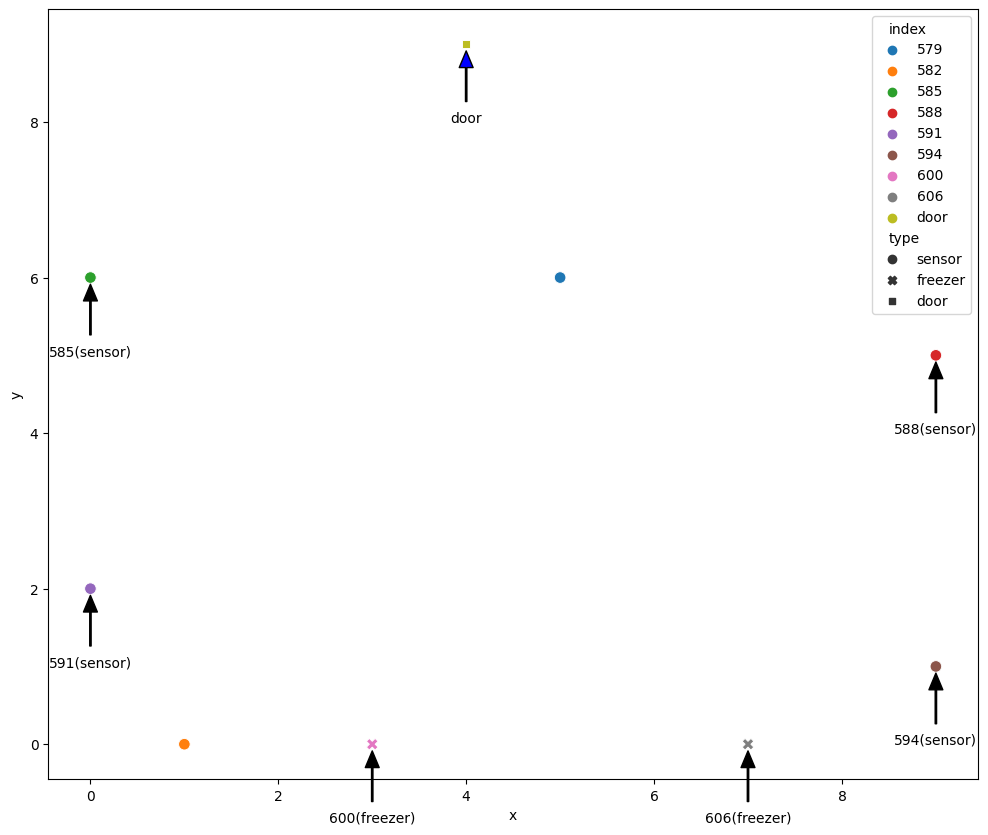

In [25]:
display_position(pos)

# Test

## test for sensor: 329 freezer: 344, 362

In [26]:
test_s = df_sensor[df_sensor['sensor_id'] == 329]
test_f1 = df_freezer[df_freezer['freezer_id'] == 344]
test_f2 = df_freezer[df_freezer['freezer_id'] == 362]

### test1 s: 338, f: 344

In [27]:
test1 = pd.merge_asof(
    left=test_f1.sort_values(by="gw_time"),
    right=test_s.sort_values(by="gw_time"),
    on="gw_time",
    direction="nearest",
    tolerance=pd.Timedelta("30 second"),
    allow_exact_matches=False,
    suffixes=("_freezer", "_sensor"),
)

C:\Users\Intellicode\AppData\Local\Temp\ipykernel_14200\882176881.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test1.corr(), linewidths = 0.1, vmax = 1.0,
c:\project\jm\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)


<AxesSubplot: title={'center': 'Person Correlation of Features'}>

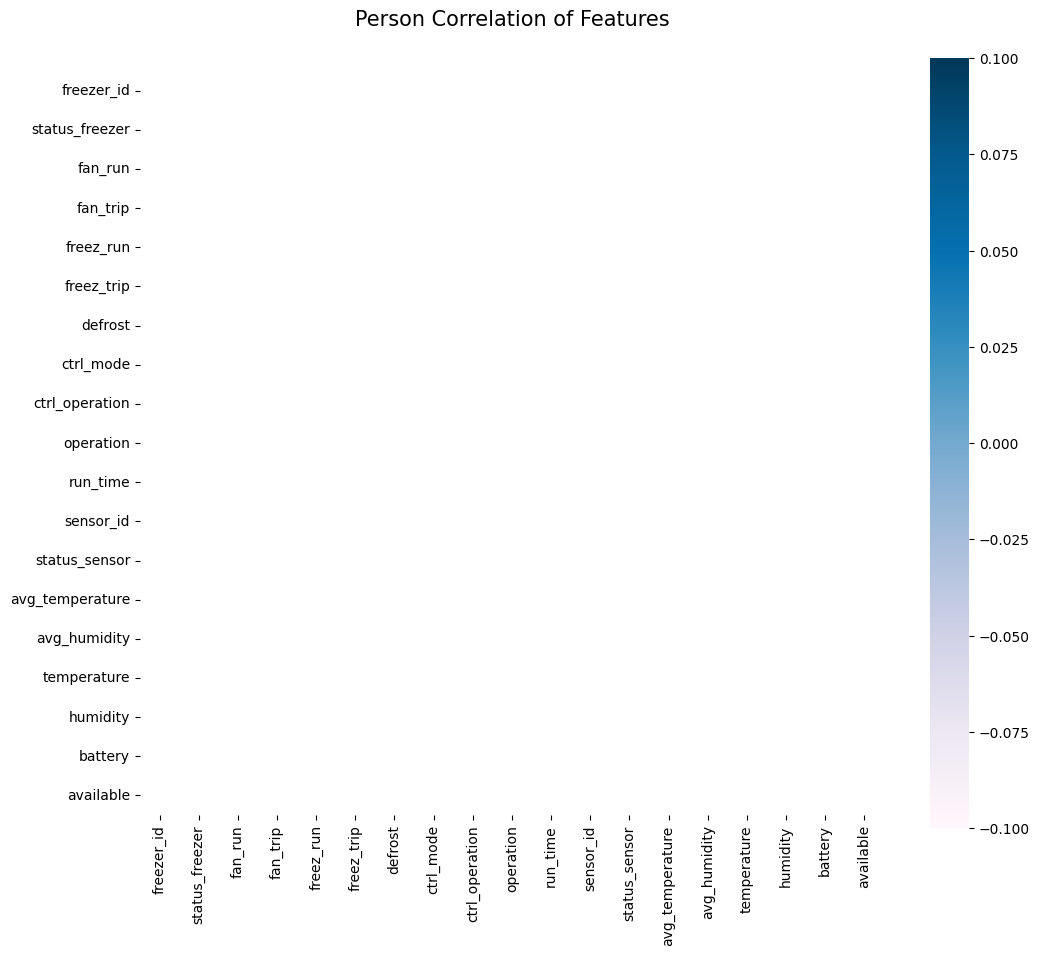

In [28]:
colormap = plt.cm.PuBu
plt.figure(figsize=(12, 10))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(test1.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})

### test2 s: 338, f: 362

In [29]:
test2 = pd.merge_asof(
    left=test_f2.sort_values(by="gw_time"),
    right=test_s.sort_values(by="gw_time"),
    on="gw_time",
    direction="nearest",
    tolerance=pd.Timedelta("30 second"),
    allow_exact_matches=False,
    suffixes=("_freezer", "_sensor"),
)

C:\Users\Intellicode\AppData\Local\Temp\ipykernel_14200\206199652.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test2.corr(), linewidths = 0.1, vmax = 1.0,
c:\project\jm\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)


<AxesSubplot: title={'center': 'Person Correlation of Features'}>

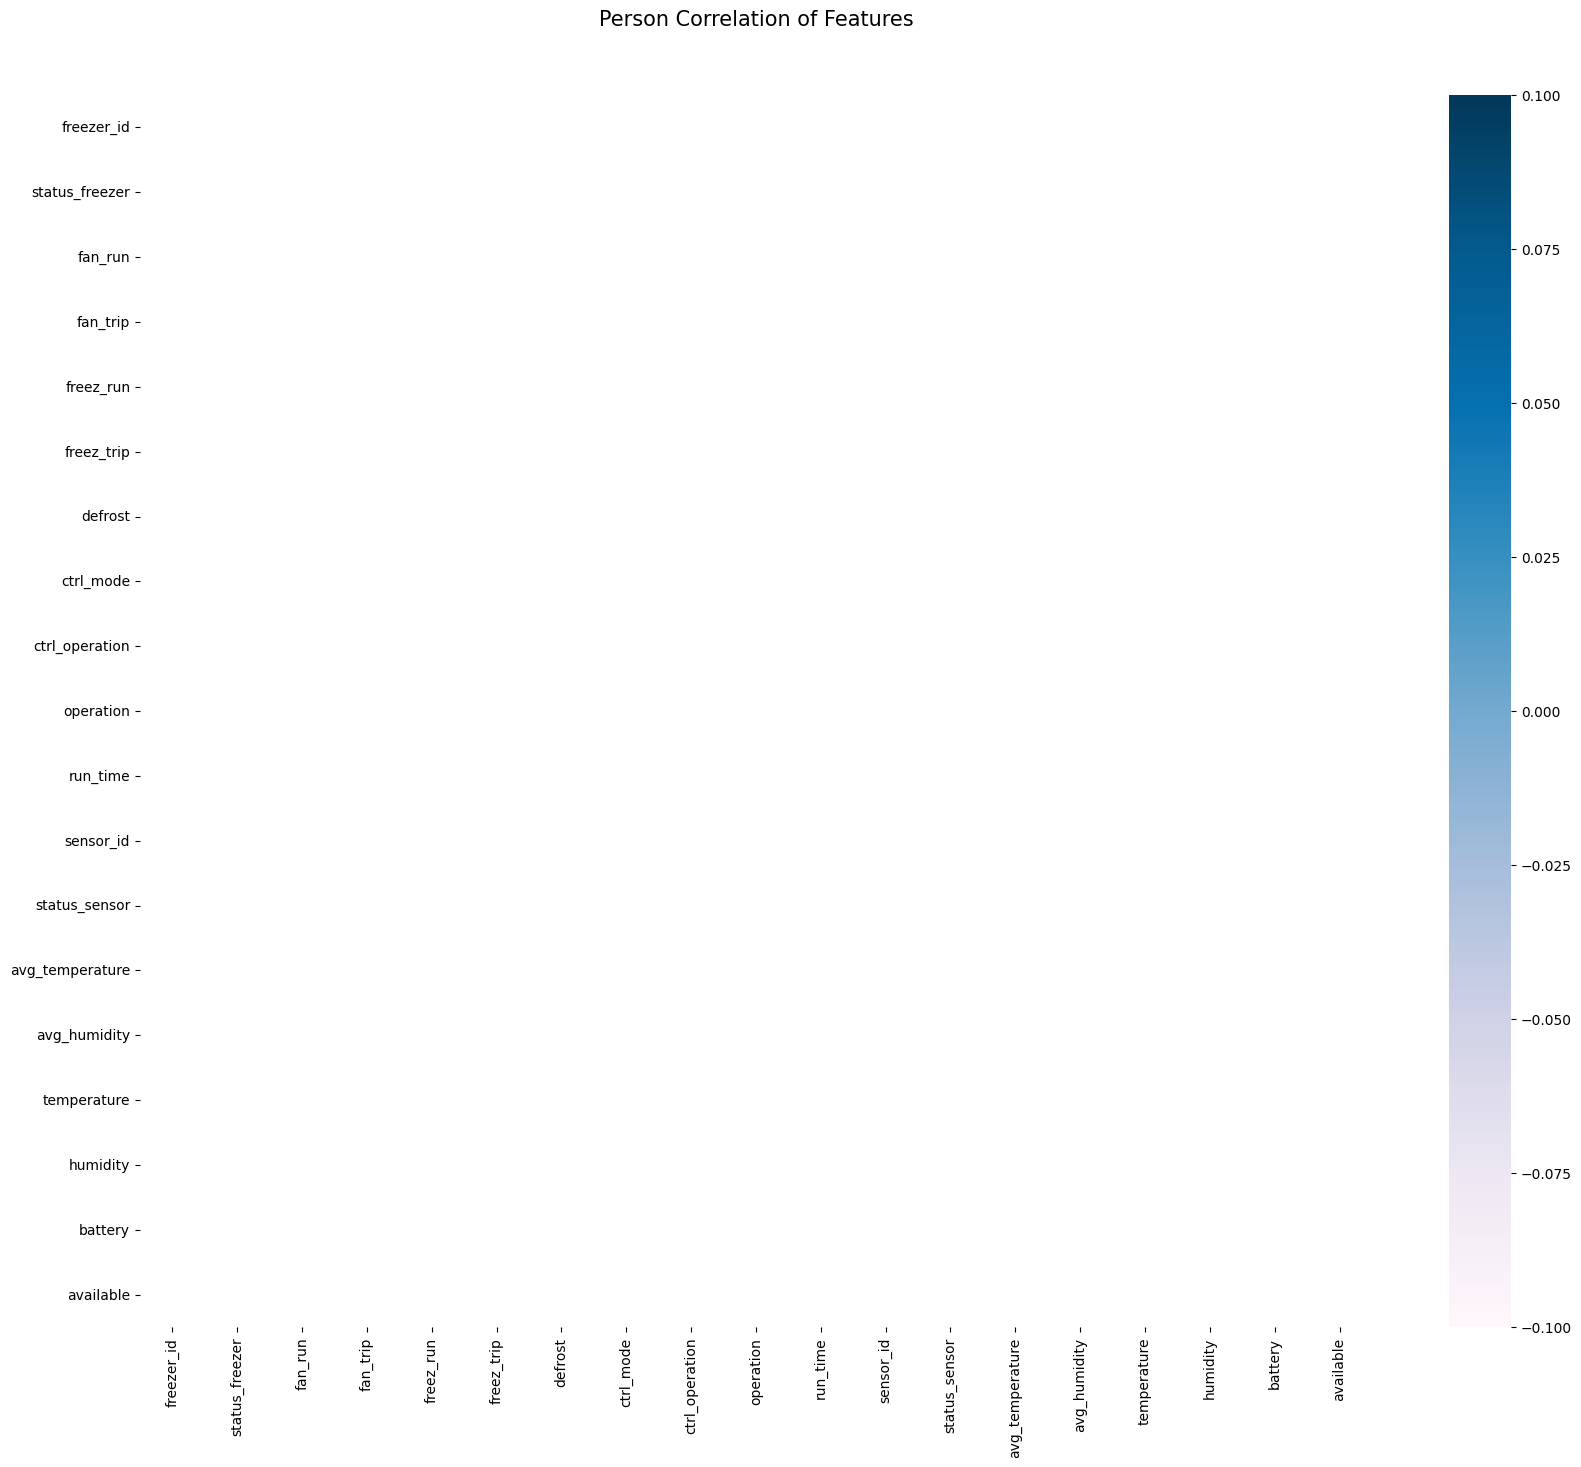

In [30]:
colormap = plt.cm.PuBu
plt.figure(figsize=(20, 16))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(test2.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})

# Mapping

## melt id to columns

In [31]:
df0 = df_freezer.copy()['gw_time']
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    df_tmp.reset_index(drop = True)
    df_tmp.drop(columns= ['freezer_id'], inplace= True)
    df_tmp.columns = ['gw_time']+[x+'_'+str(_id) for x in df_freezer.columns if x not in ['freezer_id','gw_time']]
    df0 = pd.merge(df0, df_tmp, on = 'gw_time', how = 'outer')

melted_freezer = df0


C:\Users\Intellicode\AppData\Local\Temp\ipykernel_14200\611674277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.drop(columns= ['freezer_id'], inplace= True)
C:\Users\Intellicode\AppData\Local\Temp\ipykernel_14200\611674277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.drop(columns= ['freezer_id'], inplace= True)


In [32]:
df0 = df_sensor.copy()['gw_time']
for _id in df_sensor['sensor_id'].unique():
    df_tmp = df_sensor[df_sensor['sensor_id'] == _id]
    df_tmp.reset_index(drop = True)
    df_tmp.drop(columns= ['sensor_id'], inplace= True)
    df_tmp.columns = ['gw_time']+[x+'_'+str(_id) for x in df_sensor.columns if x not in ['sensor_id','gw_time']]
    df0 = pd.merge(df0, df_tmp, on = 'gw_time', how = 'outer')

melted_sensor = df0

C:\Users\Intellicode\AppData\Local\Temp\ipykernel_14200\1020320345.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.drop(columns= ['sensor_id'], inplace= True)
C:\Users\Intellicode\AppData\Local\Temp\ipykernel_14200\1020320345.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.drop(columns= ['sensor_id'], inplace= True)
C:\Users\Intellicode\AppData\Local\Temp\ipykernel_14200\1020320345.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [33]:
melted_df = pd.merge_asof(
    left=melted_sensor.sort_values(by="gw_time"),
    right=melted_freezer.sort_values(by="gw_time"),
    on="gw_time",
    direction="nearest",
    tolerance=pd.Timedelta("30 second"),
    allow_exact_matches=False,
    suffixes=("_freezer", "_sensor"),
)
melted_df.drop_duplicates(inplace= True, ignore_index= True)

In [34]:
melted_df

,gw_time,status_585,avg_temperature_585,avg_humidity_585,temperature_585,humidity_585,battery_585,available_585,status_588,avg_temperature_588,...,status_606,fan_run_606,fan_trip_606,freez_run_606,freez_trip_606,defrost_606,ctrl_mode_606,ctrl_operation_606,operation_606,run_time_606
0,2021-02-01 00:00:28,0,44.22,100.0,3.31,100.0,100.0,1,0,44.22,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,2021-02-01 00:00:58,0,44.23,100.0,3.34,100.0,100.0,1,0,44.23,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,2021-02-01 00:01:28,0,44.24,100.0,3.37,100.0,100.0,1,0,44.24,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,2021-02-01 00:01:58,0,44.25,100.0,3.39,100.0,100.0,1,0,44.25,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
4,2021-02-01 00:02:28,0,44.27,100.0,3.41,100.0,100.0,1,0,44.27,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79999,2021-02-28 23:57:48,0,43.92,100.0,2.82,100.0,100.0,1,0,43.92,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1437.0
80000,2021-02-28 23:58:18,0,43.93,100.0,2.85,100.0,100.0,1,0,43.93,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1438.0
80001,2021-02-28 23:58:48,0,43.95,100.0,2.89,100.0,100.0,1,0,43.95,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1438.0
80002,2021-02-28 23:59:19,0,43.97,100.0,2.91,100.0,100.0,1,0,43.97,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1438.0


## delta temperture (dT)

In [35]:
# melted_df['dT_335'] = melted_df['temperature_335'] - melted_df.temperature_335.shift(1).fillna(melted_df['temperature_335'][0])
# melted_df['dT_332'] = melted_df['temperature_332'] - melted_df.temperature_332.shift(1).fillna(melted_df['temperature_332'][0])
# melted_df['dT_329'] = melted_df['temperature_329'] - melted_df.temperature_329.shift(1).fillna(melted_df['temperature_329'][0])

for _id in sensor_id:
    melted_df['dT_'+str(_id)] =  melted_df['temperature_'+str(_id)] - melted_df['temperature_'+str(_id)].shift(1).fillna(melted_df['temperature_'+str(_id)][0])


C:\Users\Intellicode\AppData\Local\Temp\ipykernel_14200\4222379397.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(sensor_id),1,i)


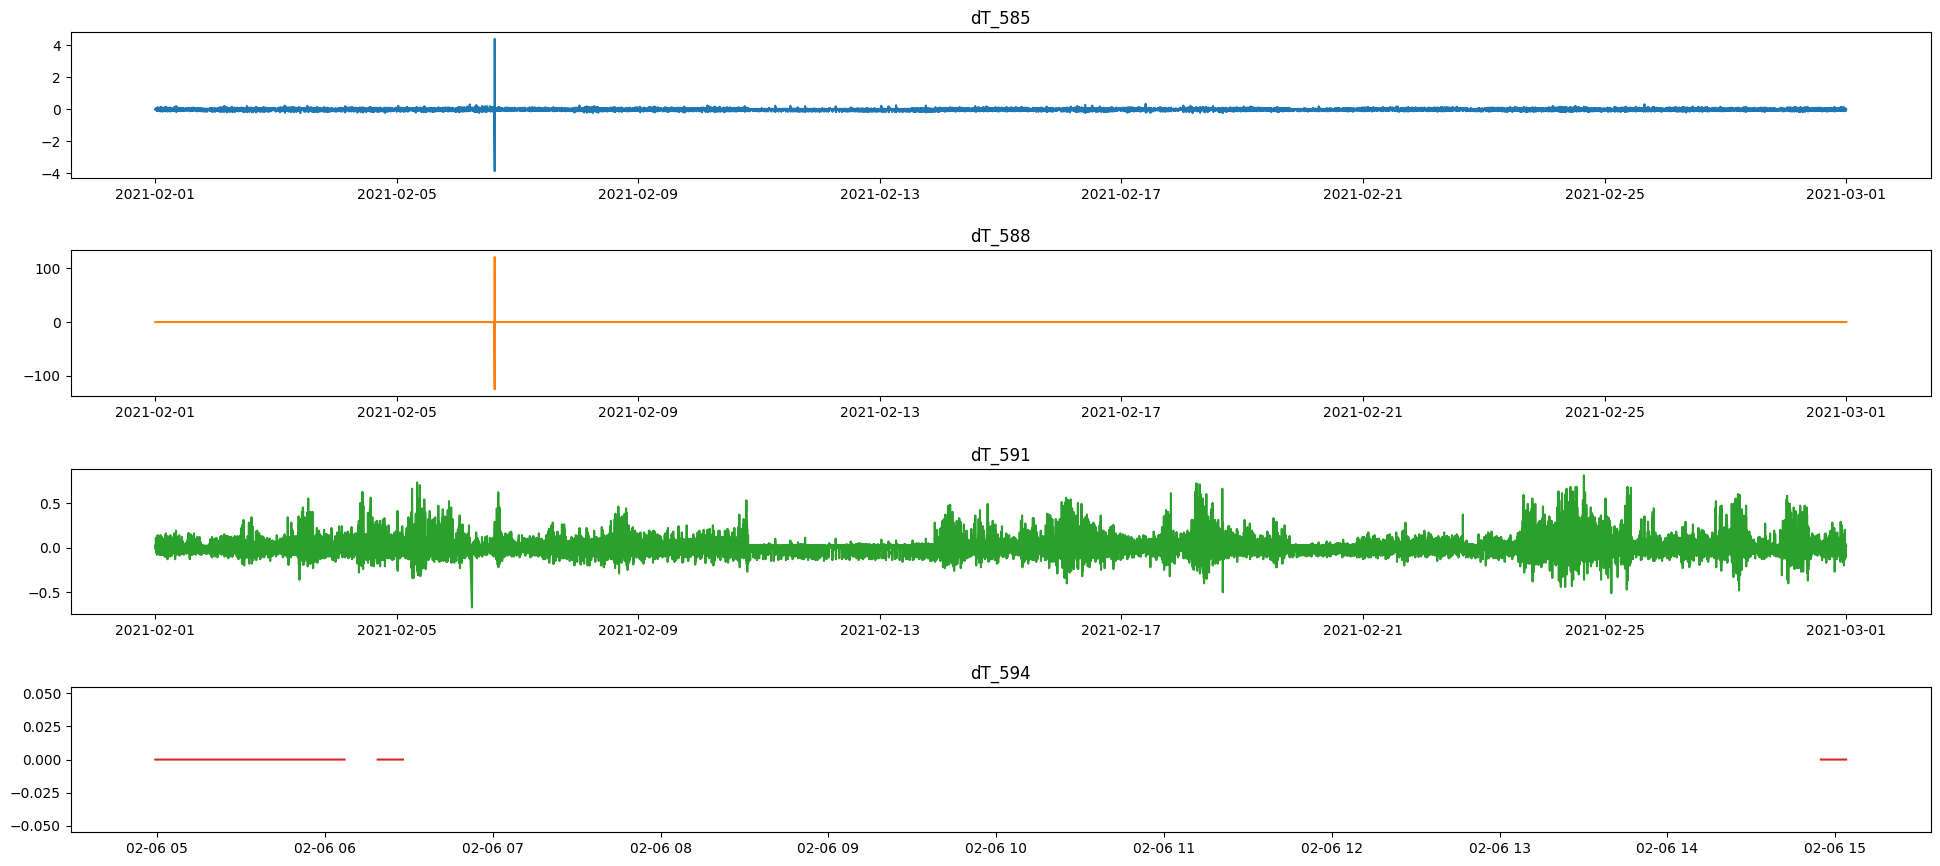

In [36]:
plt.figure(figsize = (24,10))
plt.title('delta temperature of sensors')
i = 1
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
for _id in sensor_id:
    plt.subplot(len(sensor_id),1,i)
    plt.title('dT'+'_'+str(_id))
    plt.plot(melted_df['gw_time'],melted_df['dT'+'_'+str(_id)], label = 'dT'+'_'+str(_id),alpha = 1, color = colors[i-1])
    i+=1
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)
plt.show()

## 가동에 따른 온도 변화 살펴보기

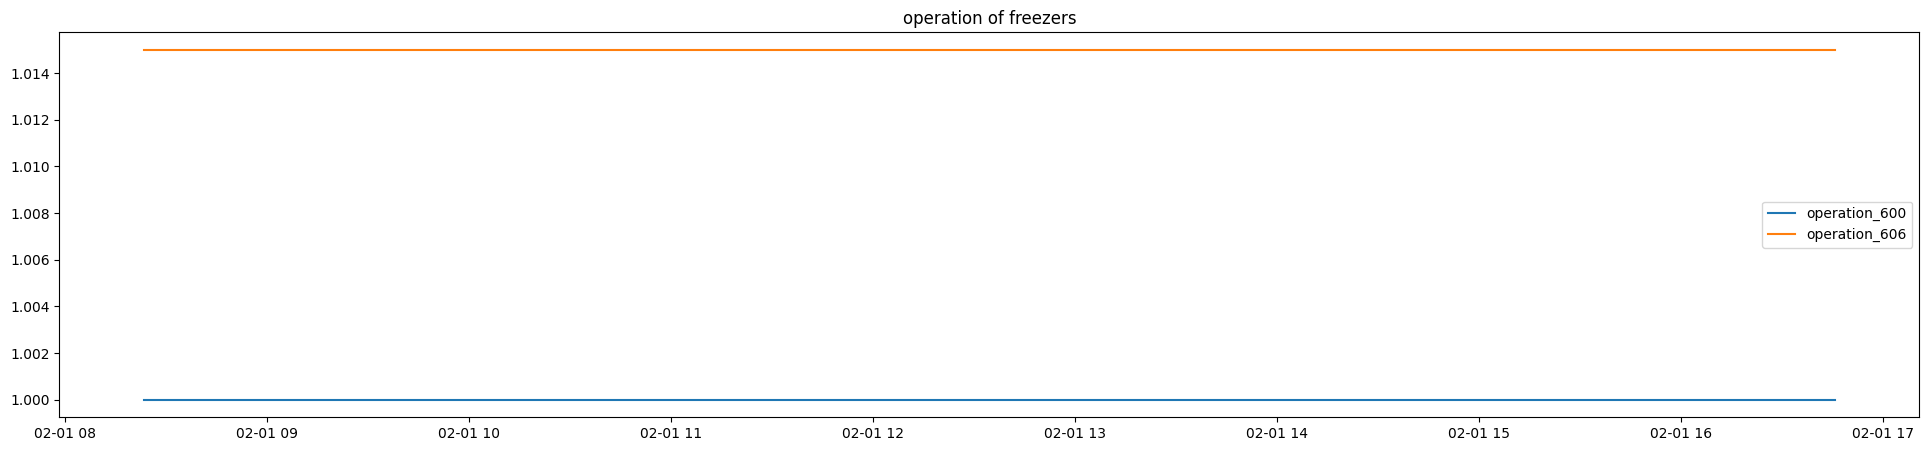

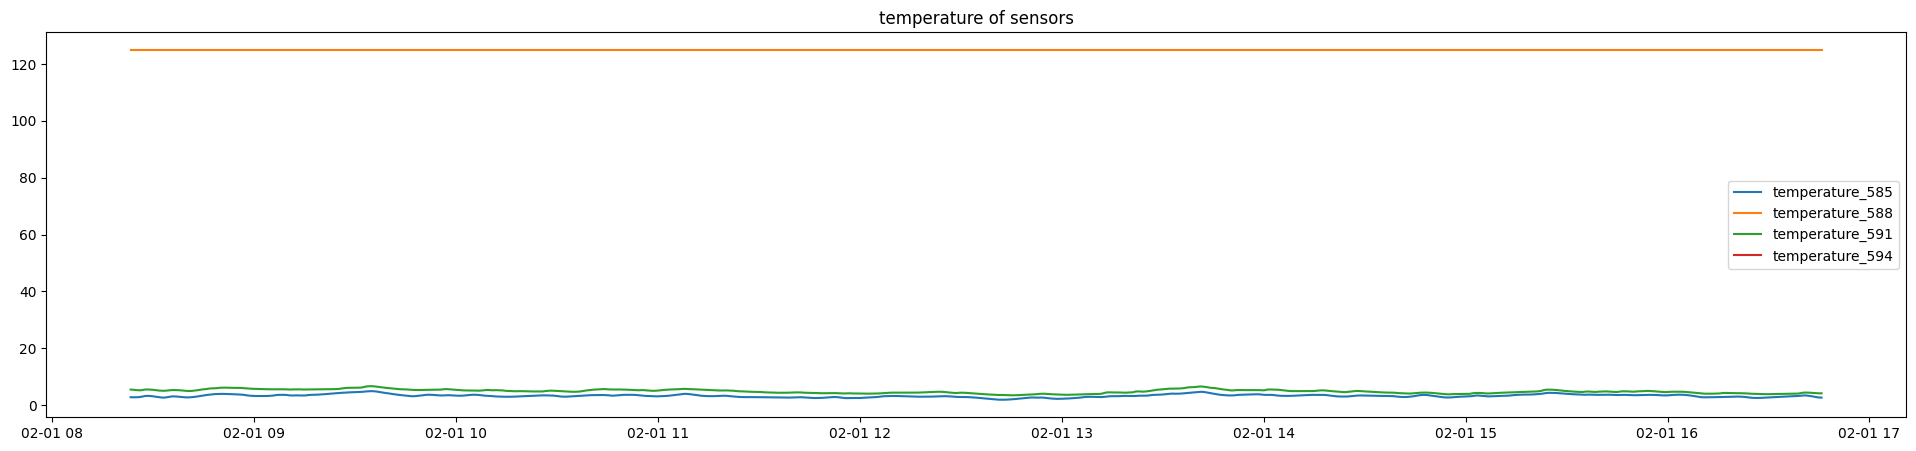

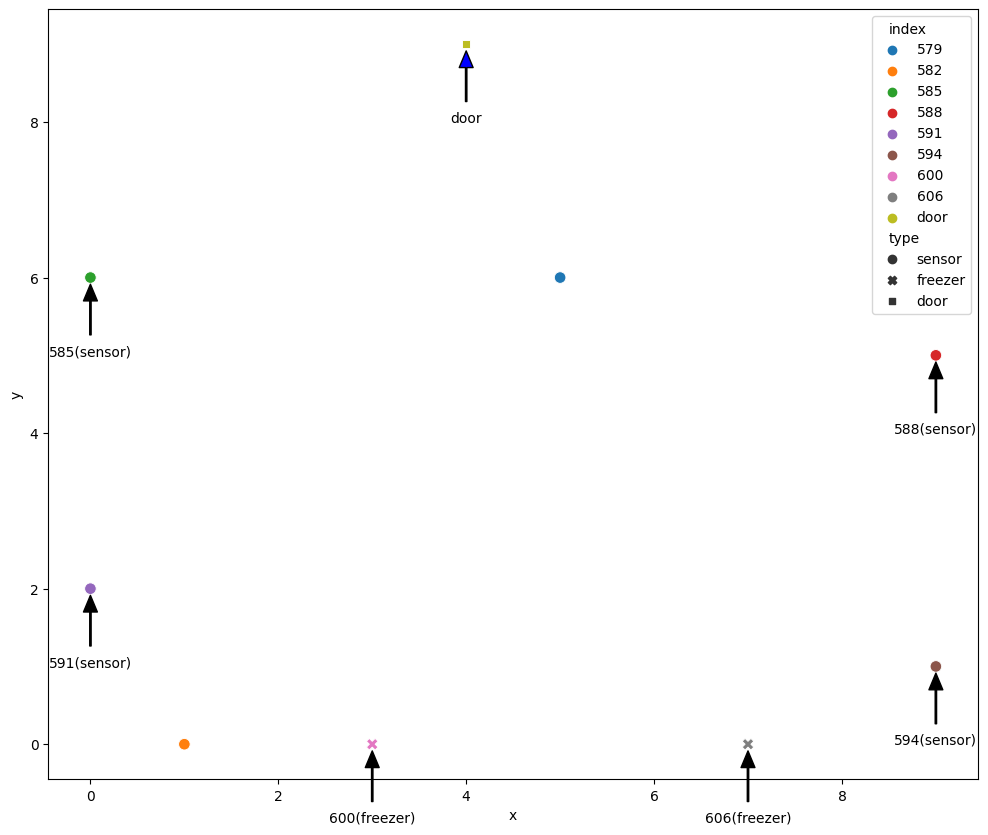

In [37]:
test_figure = melted_df[1000:2000]
plt.figure(figsize = (24,5))
plt.title("operation of freezers")
w = 0
for _id in freezer_id:
    plt.plot(test_figure['gw_time'],test_figure['operation'+'_'+str(_id)]+w, label = 'operation'+'_'+str(_id),alpha = 1)
    w+= 0.015
plt.legend()
plt.show()


plt.figure(figsize = (24,5))
plt.title('temperature of sensors')
for _id in sensor_id:
    plt.plot(test_figure['gw_time'],test_figure['temperature'+'_'+str(_id)], label = 'temperature'+'_'+str(_id),alpha = 1)
plt.legend()
plt.show()

display_position(pos)

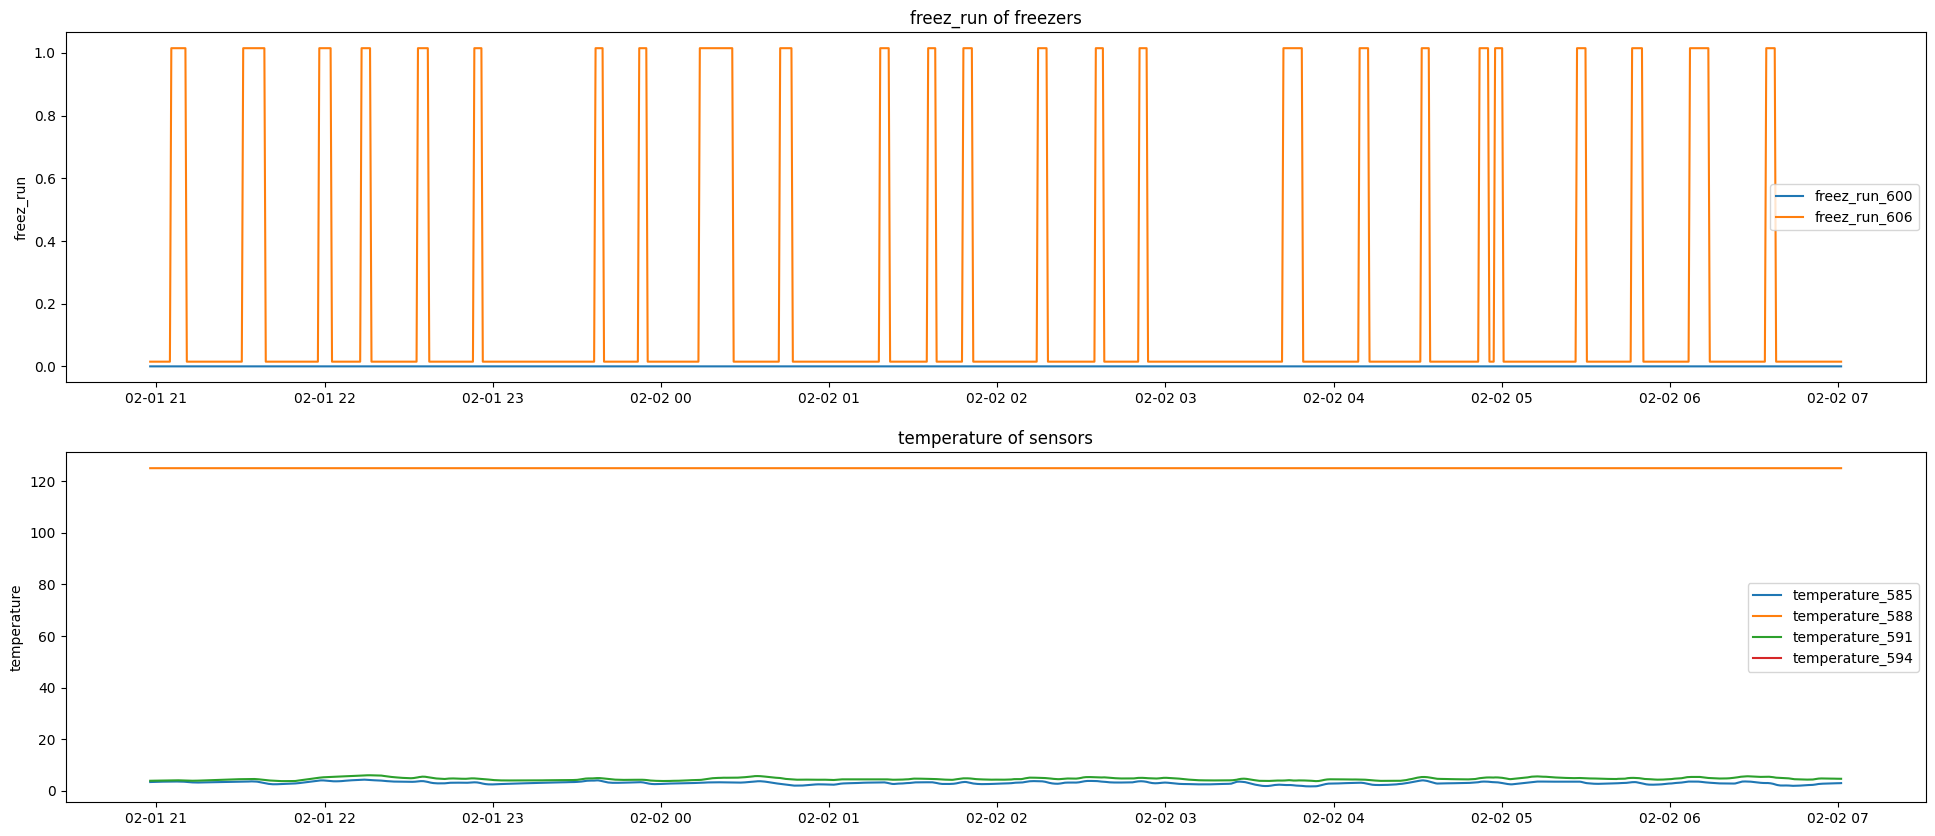

In [38]:
test_figure = melted_df[2500:3700]
plt.figure(figsize = (24,10))

plt.subplot(2,1,1)
plt.title("freez_run of freezers")
w = 0
for _id in freezer_id:
    plt.plot(test_figure['gw_time'],test_figure['freez_run'+'_'+str(_id)]+w, label = 'freez_run'+'_'+str(_id),alpha = 1)
    w+= 0.015
plt.ylabel('freez_run')
plt.legend()

plt.subplot(2,1,2)
plt.title('temperature of sensors')
for _id in sensor_id:
    plt.plot(test_figure['gw_time'],test_figure['temperature'+'_'+str(_id)], label = 'temperature'+'_'+str(_id),alpha = 1)
plt.ylabel('temperature')
plt.legend()
plt.show()


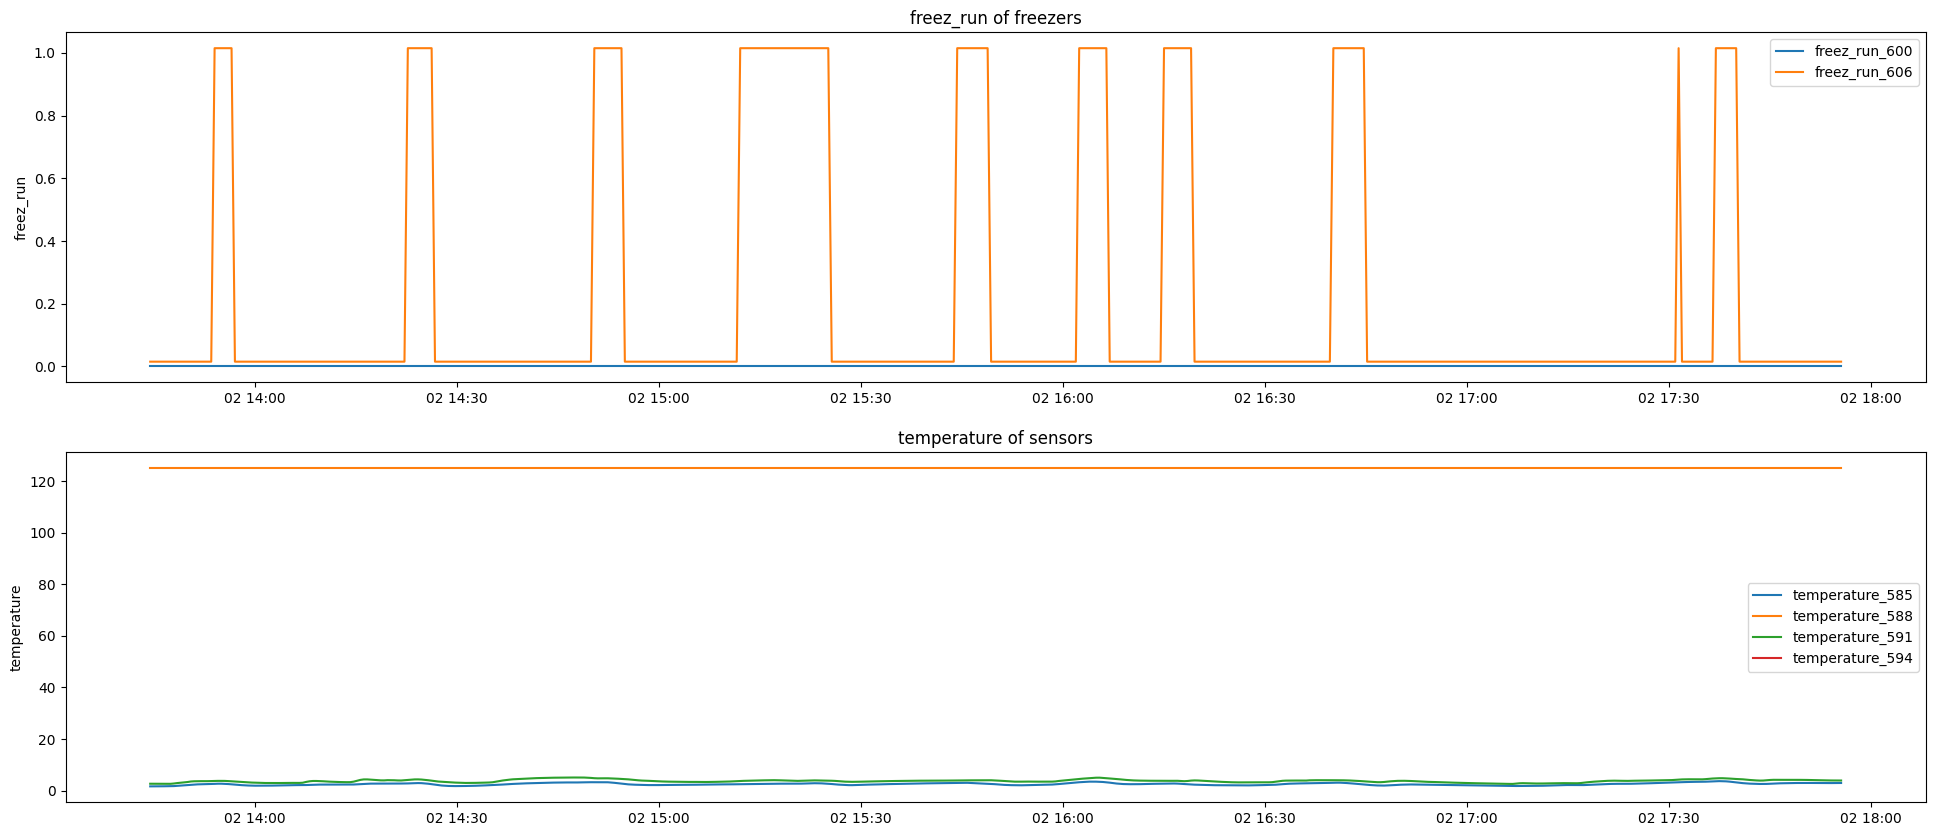

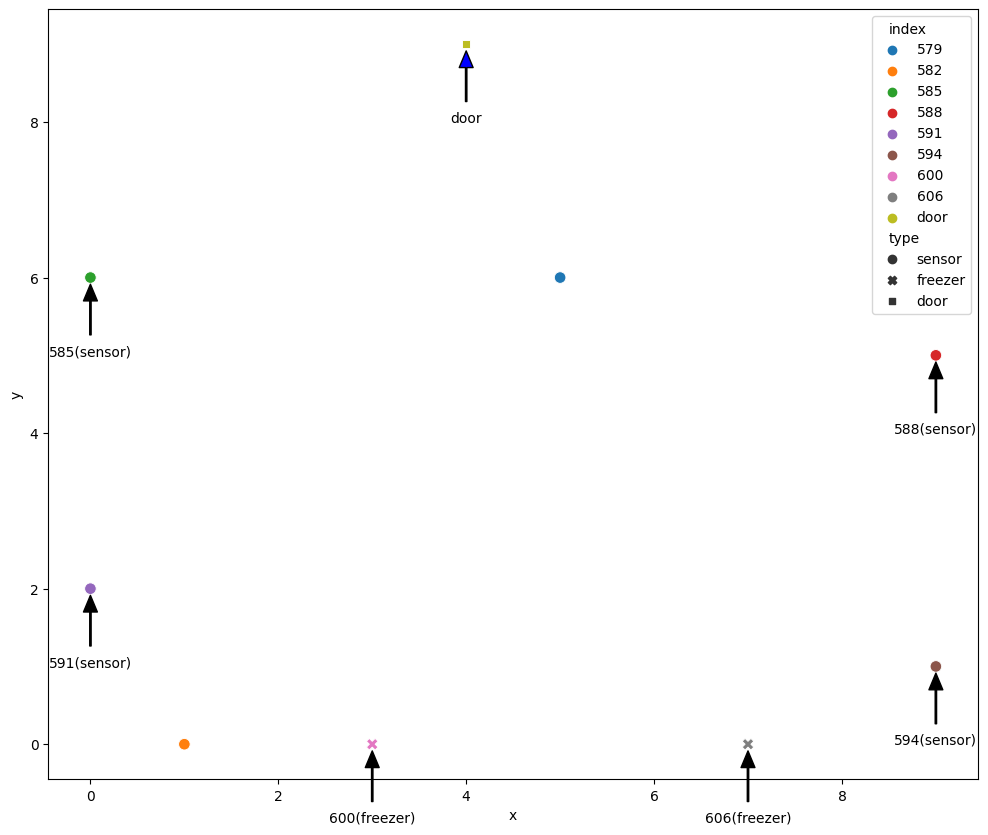

In [39]:
test_figure = melted_df[4500:5000]
plt.figure(figsize = (24,10))

plt.subplot(2,1,1)
plt.title("freez_run of freezers")
w = 0
for _id in freezer_id:
    plt.plot(test_figure['gw_time'],test_figure['freez_run'+'_'+str(_id)]+w, label = 'freez_run'+'_'+str(_id),alpha = 1)
    w+= 0.015
plt.ylabel('freez_run')
plt.legend()

plt.subplot(2,1,2)
plt.title('temperature of sensors')
for _id in sensor_id:
    plt.plot(test_figure['gw_time'],test_figure['temperature'+'_'+str(_id)], label = 'temperature'+'_'+str(_id),alpha = 1)
plt.ylabel('temperature')
plt.legend()
plt.show()

display_position(pos)

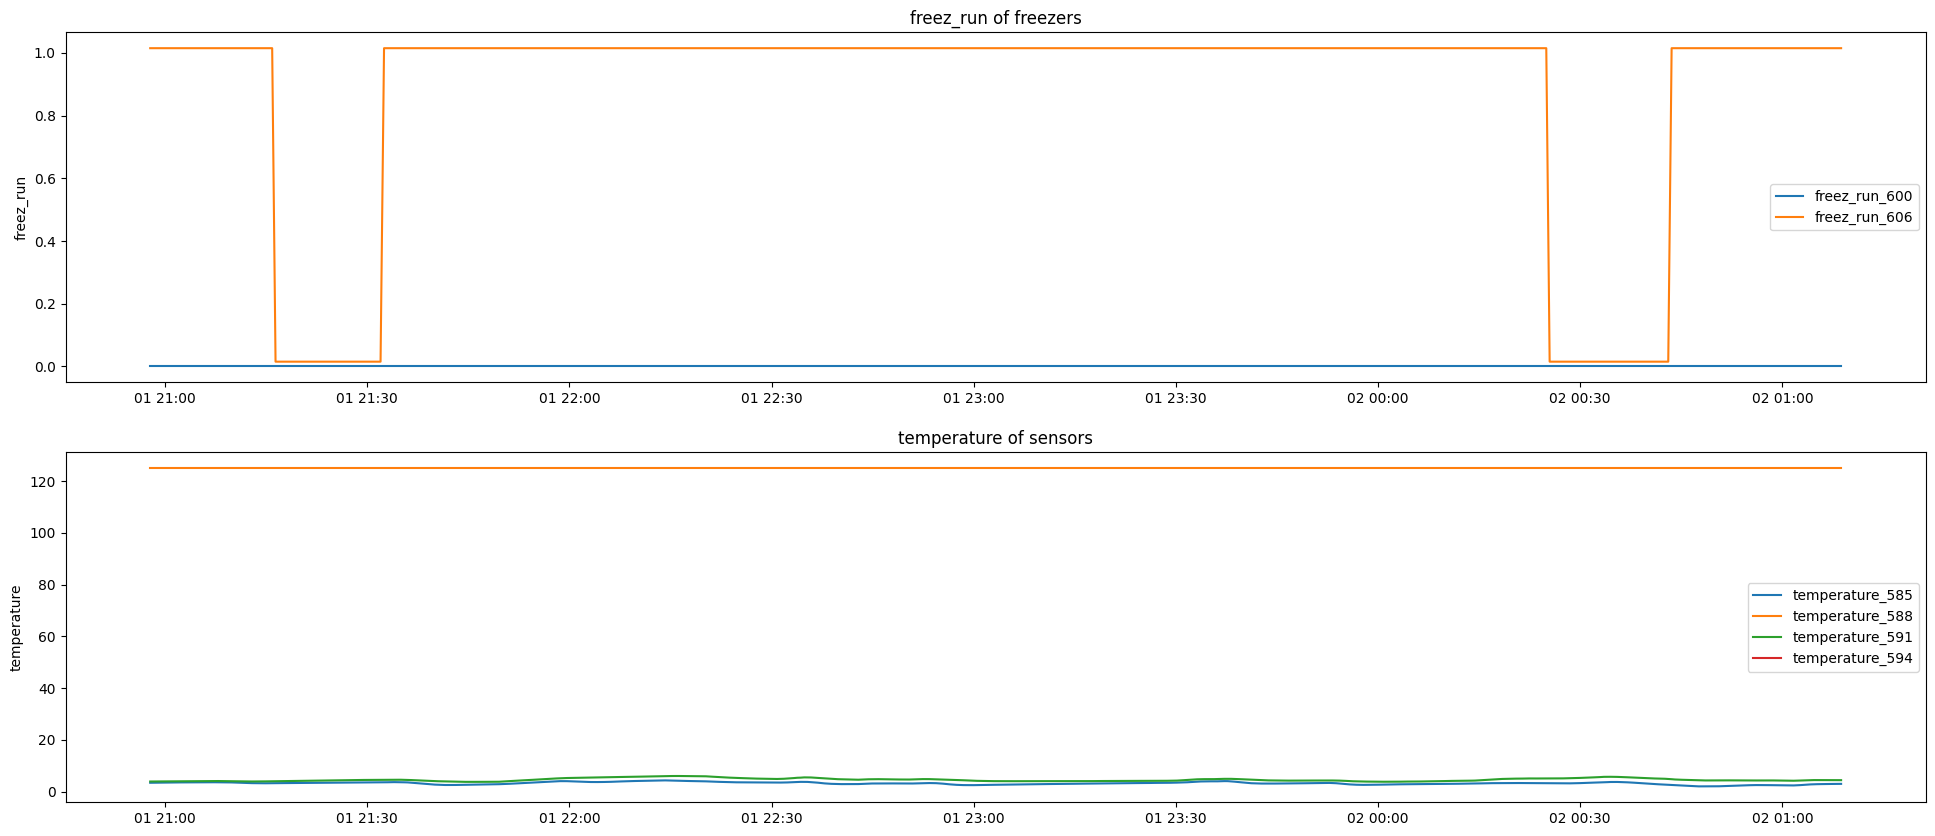

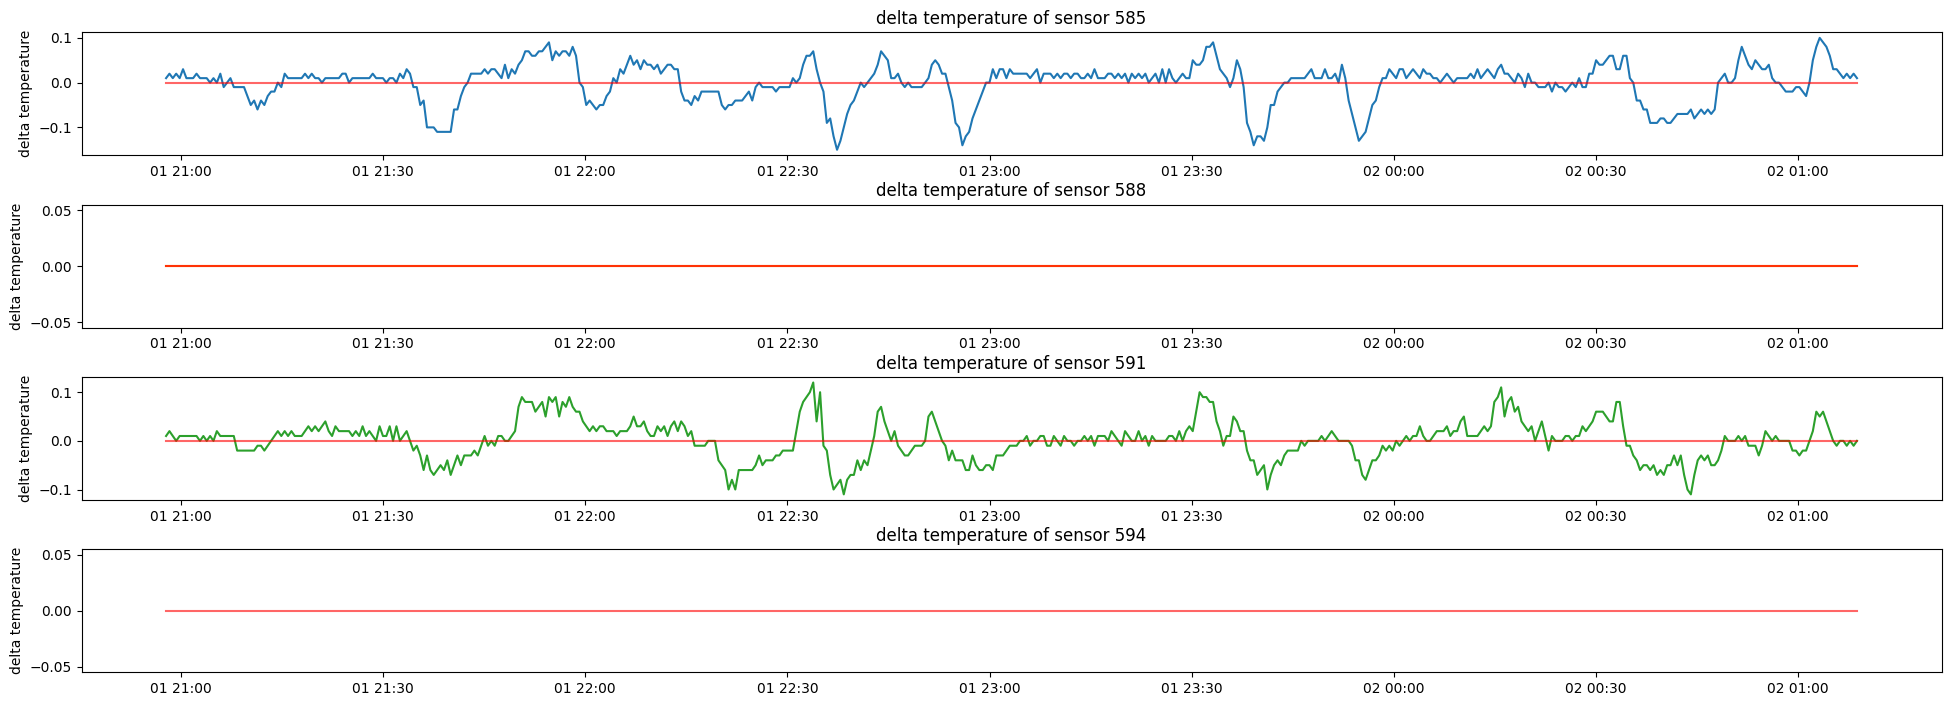

In [40]:
test_figure = melted_df[2500:3000]
plt.figure(figsize = (24,10))

plt.subplot(2,1,1)
plt.title("freez_run of freezers")
w = 0
for _id in freezer_id:
    plt.plot(test_figure['gw_time'],test_figure['fan_run'+'_'+str(_id)]+w, label = 'freez_run'+'_'+str(_id),alpha = 1)
    w+= 0.015
plt.ylabel('freez_run')
plt.legend()

plt.subplot(2,1,2)
plt.title('temperature of sensors')
for _id in sensor_id:
    plt.plot(test_figure['gw_time'],test_figure['temperature'+'_'+str(_id)], label = 'temperature'+'_'+str(_id),alpha = 1)
plt.ylabel('temperature')
plt.legend()
plt.show()

i = 1
plt.figure(figsize = (24,len(sensor_id)*2))
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
for _id in sensor_id:
    plt.subplot(len(sensor_id),1,i)
    plt.title('delta temperature of sensor '+str(_id), loc= 'center')
    plt.plot(test_figure['gw_time'],test_figure['dT'+'_'+str(_id)], label = 'dT'+'_'+str(_id),alpha = 1, color = colors[i-1])
    plt.plot(test_figure['gw_time'], [0]*len(test_figure), color = 'r', alpha = 0.6)
    plt.ylabel('delta temperature')
    i+=1
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
plt.show()

## correlation between condition of freezer and temperature, humidity
- 온도가 올라가면 freezer를 가동한다, 가동하면 온도가 떨어진다. -> freezer 가동과 온도의 상관관계 오히려 양수로 나옴
- fan을 가동하면 humidity가 떨어진다.

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaled_df = melted_df.copy()
scaler = MinMaxScaler()
float_columns = ['temperature','humidity','dT']
for _id in sensor_id:
    for col in float_columns:
        scaled_df[str(col)+'_'+str(_id)] = scaler.fit_transform(scaled_df[str(col)+'_'+str(_id)].values.reshape(-1,1))

In [42]:
sensor_cols = ['temperature','humidity']
freezer_cols = ['fan_run','freez_run','operation']
corr0 = scaled_df[[x+'_'+str(_id) for x in freezer_cols for _id in freezer_id] + [x+'_'+str(_id) for x in sensor_cols for _id in sensor_id]].corr()

<AxesSubplot: title={'center': 'correlation between condition of freezer and temperature'}>

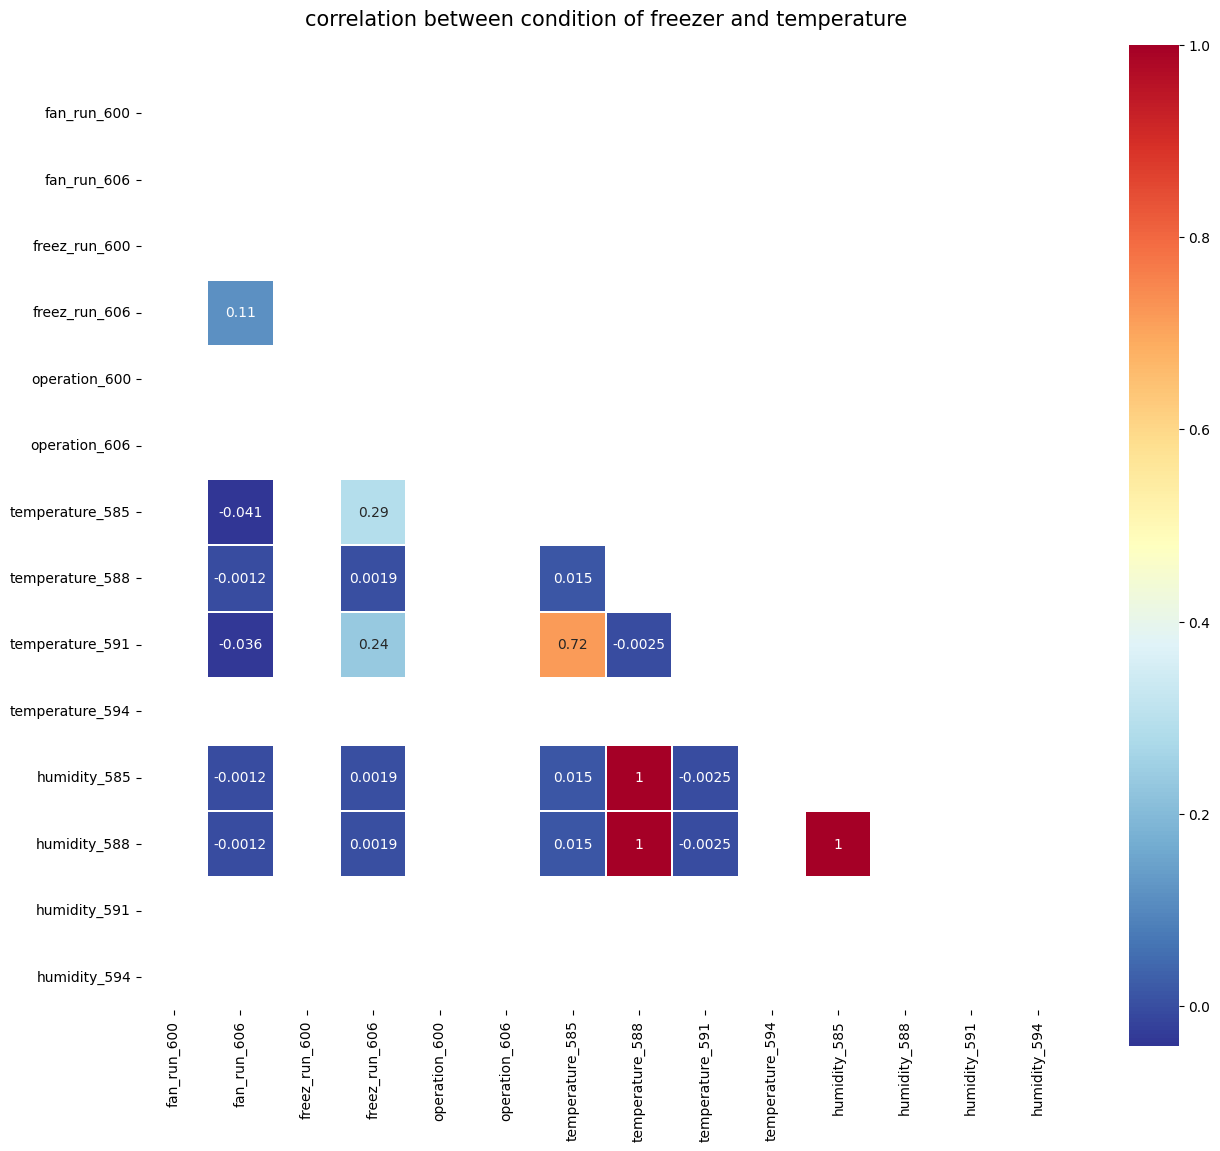

In [43]:
mask = np.zeros_like(corr0, dtype= np.bool_)
mask[np.triu_indices_from(mask)] = True

colormap = plt.cm.PuBu
plt.figure(figsize=(15, 13))
plt.title("correlation between condition of freezer and temperature", y = 1.05, size = 15)
sns.heatmap(corr0, linewidths = 0.1,mask= mask, vmax = 1.0,square = True, cmap = 'RdYlBu_r', linecolor = "white", annot = True, annot_kws = {"size" : 10})



In [44]:
melted_df.columns

Index(['gw_time', 'status_585', 'avg_temperature_585', 'avg_humidity_585',
       'temperature_585', 'humidity_585', 'battery_585', 'available_585',
       'status_588', 'avg_temperature_588', 'avg_humidity_588',
       'temperature_588', 'humidity_588', 'battery_588', 'available_588',
       'status_591', 'avg_temperature_591', 'avg_humidity_591',
       'temperature_591', 'humidity_591', 'battery_591', 'available_591',
       'status_594', 'avg_temperature_594', 'avg_humidity_594',
       'temperature_594', 'humidity_594', 'battery_594', 'available_594',
       'status_600', 'fan_run_600', 'fan_trip_600', 'freez_run_600',
       'freez_trip_600', 'defrost_600', 'ctrl_mode_600', 'ctrl_operation_600',
       'operation_600', 'run_time_600', 'status_606', 'fan_run_606',
       'fan_trip_606', 'freez_run_606', 'freez_trip_606', 'defrost_606',
       'ctrl_mode_606', 'ctrl_operation_606', 'operation_606', 'run_time_606',
       'dT_585', 'dT_588', 'dT_591', 'dT_594'],
      dtype='object'

In [45]:
corr_cols = [str(f_col)+'_'+str(_id) for f_col in df_freezer.columns if f_col not in ['freezer_id','gw_time','status','run_time'] for _id in freezer_id] + [str(s_col)+'_'+str(_id) for s_col in ['temperature','humidity','dT'] for _id in sensor_id]
scaled_df1 = scaled_df[corr_cols]
corr1 = scaled_df1.corr()

<AxesSubplot: title={'center': 'correlation between condition of freezer and temperature'}>

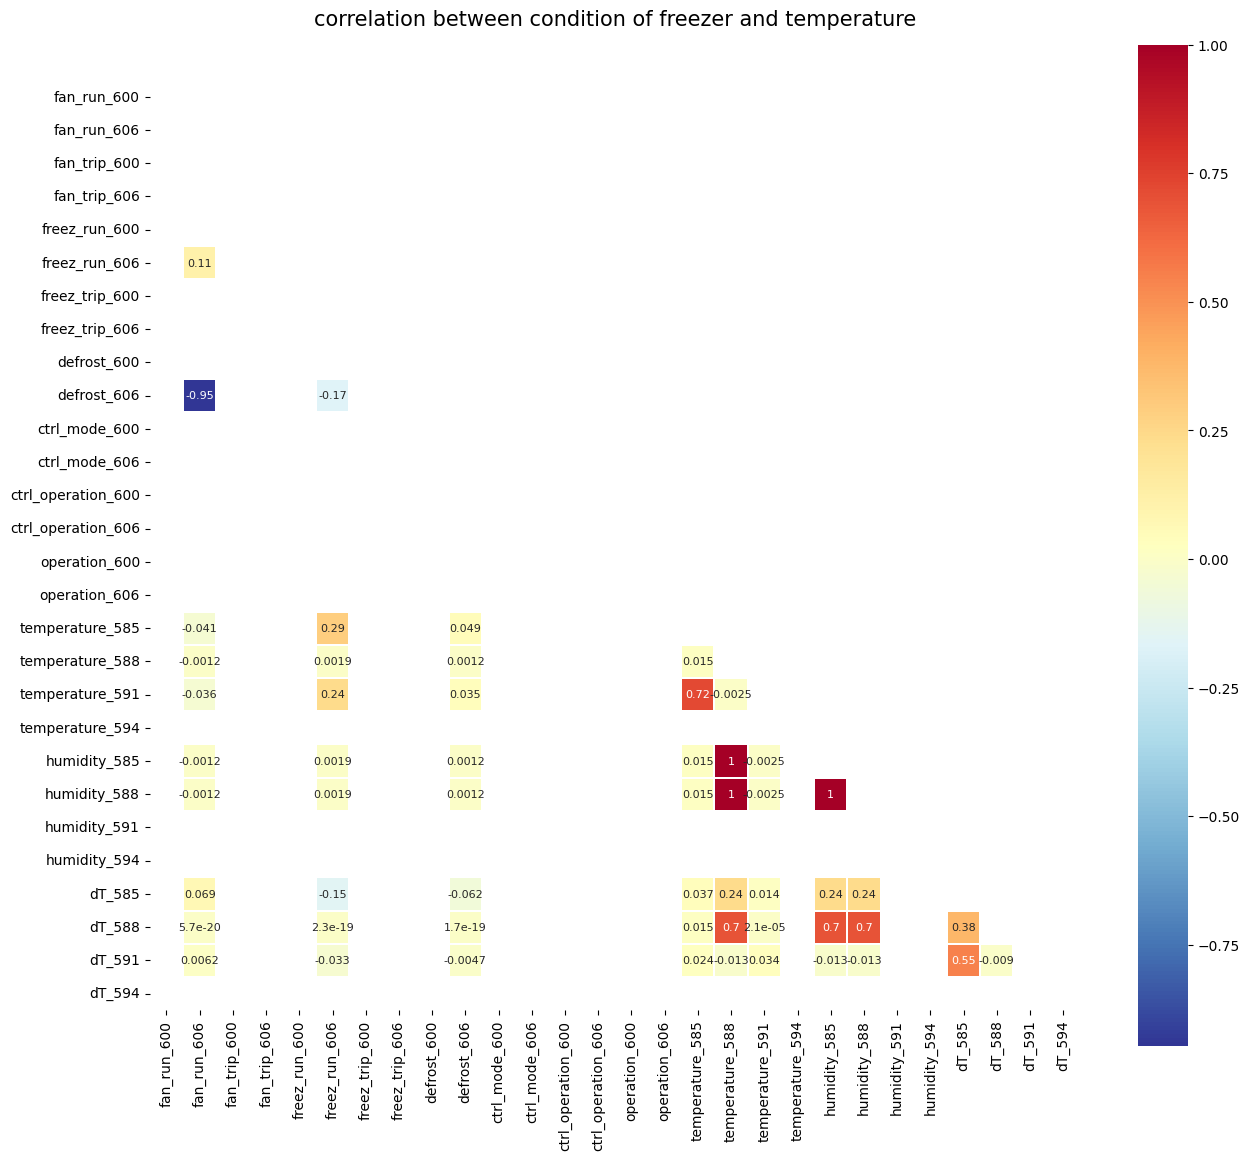

In [46]:
mask = np.zeros_like(corr1, dtype= np.bool_)
mask[np.triu_indices_from(mask)] = True

colormap = plt.cm.PuBu
plt.figure(figsize=(15, 13))
plt.title("correlation between condition of freezer and temperature", y = 1.05, size = 15)
sns.heatmap(corr1, linewidths = 0.1,mask= mask, vmax = 1.0,square = True, cmap = 'RdYlBu_r', linecolor = "white", annot = True, annot_kws = {"size" : 8})


In [47]:
corr1.dropna().columns

Index(['fan_run_600', 'fan_run_606', 'fan_trip_600', 'fan_trip_606',
       'freez_run_600', 'freez_run_606', 'freez_trip_600', 'freez_trip_606',
       'defrost_600', 'defrost_606', 'ctrl_mode_600', 'ctrl_mode_606',
       'ctrl_operation_600', 'ctrl_operation_606', 'operation_600',
       'operation_606', 'temperature_585', 'temperature_588',
       'temperature_591', 'temperature_594', 'humidity_585', 'humidity_588',
       'humidity_591', 'humidity_594', 'dT_585', 'dT_588', 'dT_591', 'dT_594'],
      dtype='object')

# 온도 변화량 탐색 - 외부 요인 추출

In [48]:
dT_col = ['dT_'+ str(_id) for _id in sensor_id]

In [49]:
melted_df[dT_col].describe()

,dT_585,dT_588,dT_591,dT_594
count,80004.000000,80004.000000,80004.000000,66.0
mean,-0.000005,0.000000,-0.000004,0.0
std,0.054786,0.614879,0.079184,0.0
min,-3.860000,-125.010000,-0.670000,0.0
25%,-0.020000,0.000000,-0.040000,0.0
50%,0.010000,0.000000,0.000000,0.0
75%,0.030000,0.000000,0.020000,0.0
max,4.410000,120.840000,0.810000,0.0


<AxesSubplot: >

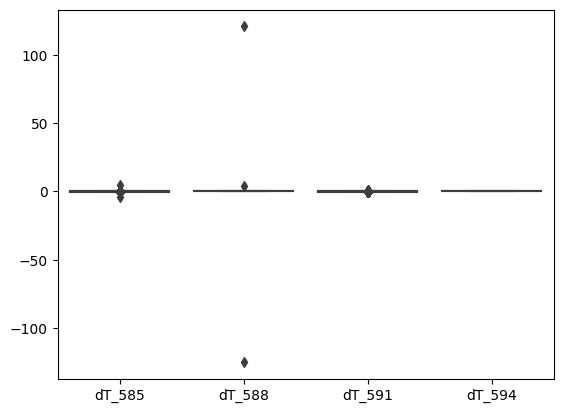

In [50]:
sns.boxplot(melted_df[dT_col])

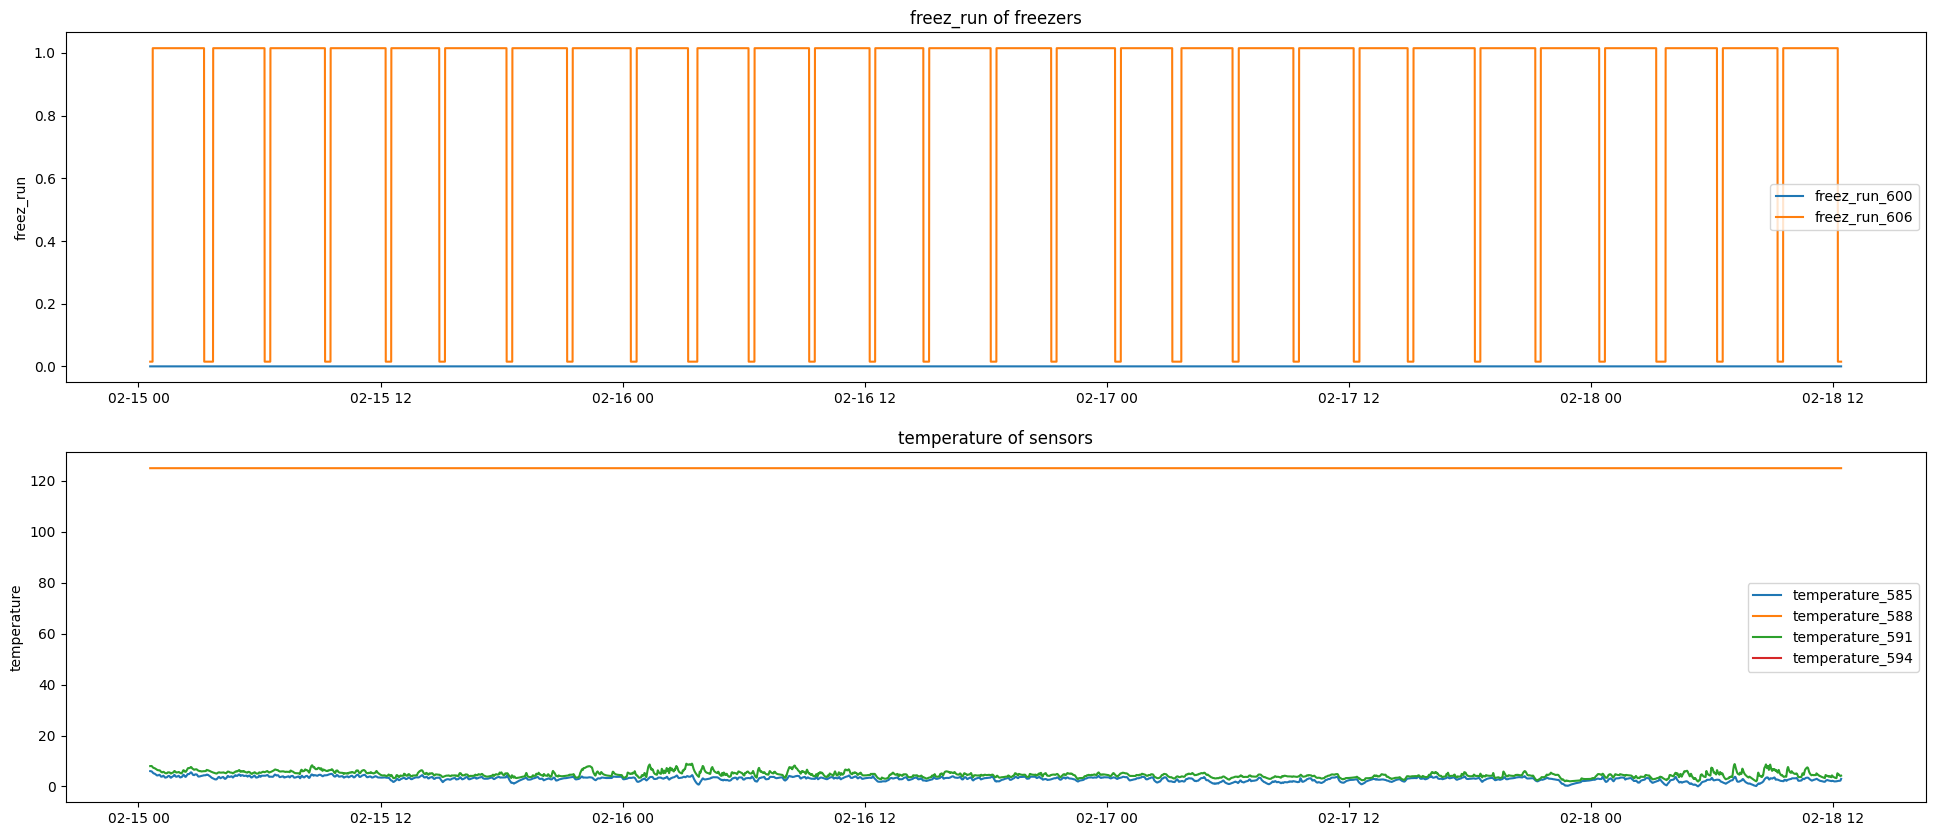

ValueError: num must be 1 <= num <= 3, not 4

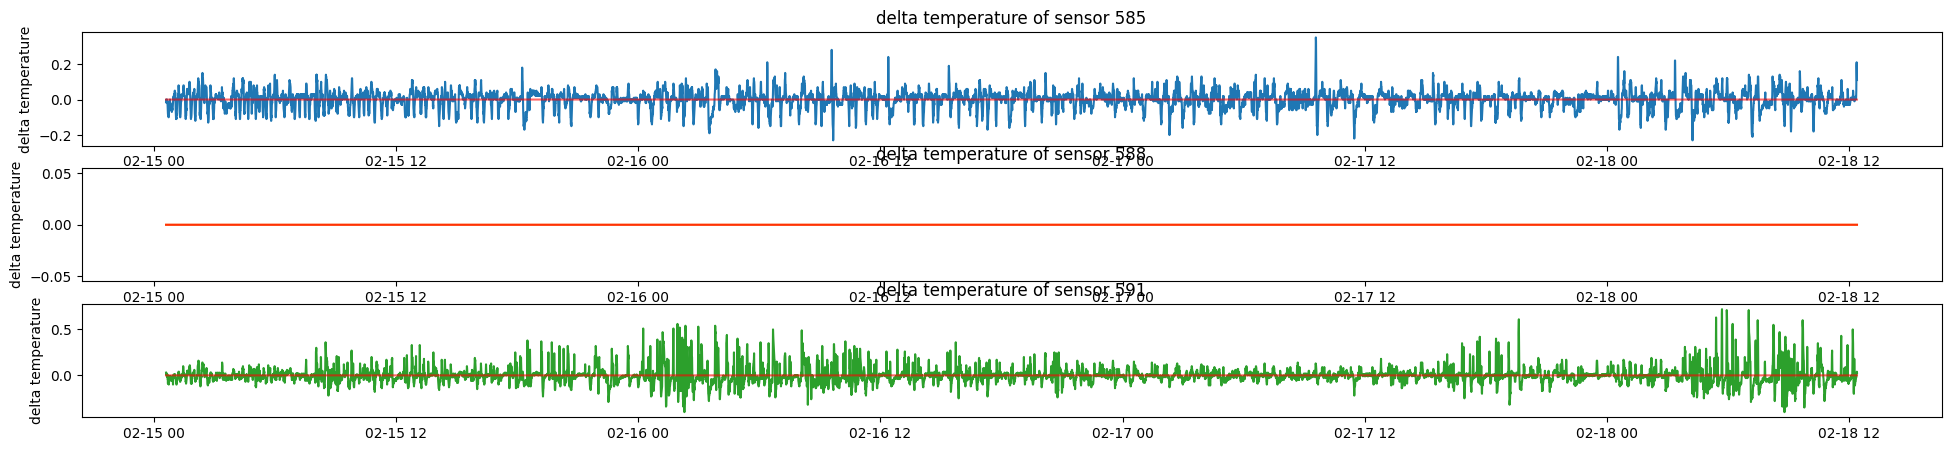

In [55]:
test_figure = melted_df[40000:50000]
plt.figure(figsize = (24,10))

plt.subplot(2,1,1)
plt.title("freez_run of freezers")
w = 0
for _id in freezer_id:
    plt.plot(test_figure['gw_time'],test_figure['fan_run'+'_'+str(_id)]+w, label = 'freez_run'+'_'+str(_id),alpha = 1)
    w+= 0.015
plt.ylabel('freez_run')
plt.legend()
plt.subplot(2,1,2)
plt.title('temperature of sensors')
for _id in sensor_id:
    plt.plot(test_figure['gw_time'],test_figure['temperature'+'_'+str(_id)], label = 'temperature'+'_'+str(_id),alpha = 1)
plt.ylabel('temperature')
plt.legend()
plt.show()
i = 1
colors = ['tab:blue','tab:orange','tab:green']
plt.figure(figsize = (24,5))
for _id in sensor_id:
    plt.subplot(3,1,i)
    plt.title('delta temperature of sensor '+str(_id), loc= 'center')
    plt.plot(test_figure['gw_time'],test_figure['dT'+'_'+str(_id)], label = 'dT'+'_'+str(_id),alpha = 1, color = colors[i-1])
    plt.plot(test_figure['gw_time'], [0]*len(test_figure), color = 'r', alpha = 0.6)
    plt.ylabel('delta temperature')
    i+=1
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
plt.show()

# 간단한 모델 만들기

In [227]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [146]:
df = melted_df.copy()[cols]
df.index = melted_df['gw_time']
df = df.dropna()



In [158]:
TEST_SIZE = 8000
train = df[:-TEST_SIZE]
test = df[-TEST_SIZE:]

In [224]:
train

,fan_run_344,freez_run_344,ctrl_mode_344,ctrl_operation_344,operation_344,fan_run_362,freez_run_362,ctrl_mode_362,ctrl_operation_362,operation_362,...,fan_trip_368,freez_run_368,ctrl_mode_368,ctrl_operation_368,operation_368,dT_335,dT_332,dT_329,freez_run_all,temperature_329
gw_time,,,,,,,,,,,,,,,,,,,,,
2021-02-01 00:00:04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.190476,0.324324,0.428571,0.333333,0.205817
2021-02-01 00:00:34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.206349,0.297297,0.380952,0.333333,0.203579
2021-02-01 00:01:04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.190476,0.297297,0.428571,0.333333,0.203579
2021-02-01 00:01:35,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.190476,0.378378,0.428571,0.333333,0.203579
2021-02-01 00:02:05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.190476,0.324324,0.476190,0.333333,0.205817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-26 04:51:39,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.190476,0.324324,0.428571,0.333333,0.617450
2021-02-26 04:52:09,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.206349,0.297297,0.380952,0.333333,0.615213
2021-02-26 04:52:39,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.174603,0.324324,0.428571,0.333333,0.615213


In [159]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['dT_335', 'dT_332', 'dT_329', 'freez_run_all','temperature_329']
for col in scale_cols:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1,1))

In [160]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [187]:
feature_cols = ['fan_run_344', 'freez_run_344',
       'operation_344', 'fan_run_362', 'freez_run_362',
       'operation_362', 'fan_run_368',
       'freez_run_368',
       'operation_368','dT_329']
label_cols = ['temperature_329']

train_feature = train[feature_cols]
train_label = train[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2, shuffle = False)

x_train.shape, x_valid.shape
# ((57676, 20, 21), (14419, 20, 21))

test_feature = test[feature_cols]
test_label = test[label_cols]

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((7980, 20, 11), (7980, 1))

In [188]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='tanh', 
               return_sequences=False)
          )
model.add(Dense(1))

In [189]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join('C:/project/_files/Aerix_freezer/model', 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=100, 
                    batch_size=256,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint],
                    shuffle = False)

Epoch 1/100
222/226 [============================>.] - ETA: 0s - loss: 0.0078
Epoch 1: val_loss improved from inf to 0.04566, saving model to C:/project/_files/Aerix_freezer/model\tmp_checkpoint.h5
226/226 [==============================] - 4s 11ms/step - loss: 0.0078 - val_loss: 0.0457
Epoch 2/100
224/226 [============================>.] - ETA: 0s - loss: 0.0054
Epoch 2: val_loss improved from 0.04566 to 0.04436, saving model to C:/project/_files/Aerix_freezer/model\tmp_checkpoint.h5
226/226 [==============================] - 2s 10ms/step - loss: 0.0054 - val_loss: 0.0444
Epoch 3/100
222/226 [============================>.] - ETA: 0s - loss: 0.0052
Epoch 3: val_loss improved from 0.04436 to 0.04411, saving model to C:/project/_files/Aerix_freezer/model\tmp_checkpoint.h5
226/226 [==============================] - 2s 9ms/step - loss: 0.0052 - val_loss: 0.0441
Epoch 4/100
220/226 [============================>.] - ETA: 0s - loss: 0.0052
Epoch 4: val_loss improved from 0.04411 to 0.04408,

In [221]:
# weight 로딩
model.load_weights(filename)

# 예측
pred = model.predict(test_feature)

250/250 [==============================] - 1s 4ms/step


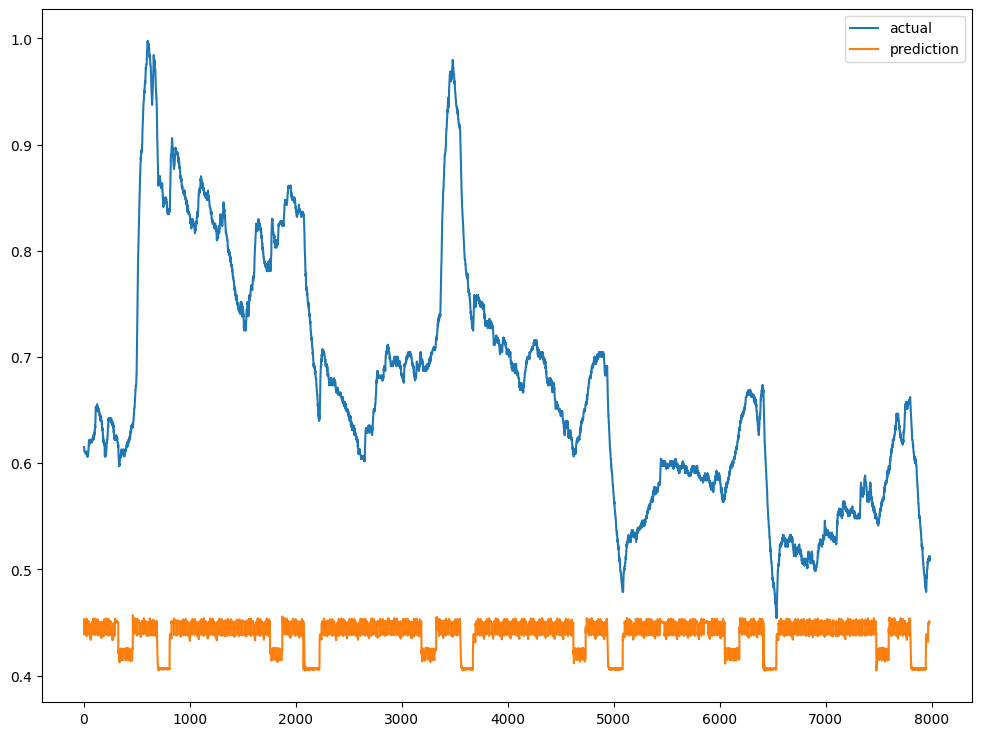

In [226]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()